In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Using raw string to avoid issues with backslashes
df = pd.read_csv(r'c:\mydata\G8Vitamin\data\final\LOCMM_08062025_DATASET_VITAMINd.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30065 entries, 0 to 30064
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      30065 non-null  float64
 1   Gender                    30065 non-null  float64
 2   Age                       30065 non-null  float64
 3   Race                      30065 non-null  float64
 4   familysize                30065 non-null  float64
 5   PIR                       27524 non-null  float64
 6   BMXWT                     29603 non-null  float64
 7   BMXHT                     29635 non-null  float64
 8   BMI                       29511 non-null  float64
 9   WaistCircumference        28600 non-null  float64
 10  FastingGlucose            28302 non-null  float64
 11  ALT                       27923 non-null  float64
 12  AST                       27912 non-null  float64
 13  AlkalinePhosphotase       27948 non-null  float64
 14  Choles

In [33]:
# Remove columns not needed to measure data quality
remove_columns = [
    'SEQN', 'YearID', 'HBsAg','Hba1c'
]

df_dq = df.drop(columns=remove_columns)

In [35]:
# Describe data
df_dq.describe()

,Gender,Age,Race,familysize,PIR,BMXWT,BMXHT,BMI,WaistCircumference,FastingGlucose,...,Hemoglobin,Hematocrit,MeanCellVolumn,MeanCellHemoglobin,RedCellDistributionWidth,PlateletCount,MeanPlateletVolume,VitaminD,SmokeFam,milk_consumption
count,30065.000000,30065.000000,30065.000000,30065.000000,2.752400e+04,29603.000000,29635.000000,29511.000000,28600.000000,28302.000000,...,28430.000000,28430.000000,28430.000000,28437.000000,28430.000000,28429.000000,28429.000000,27722.000000,2.506000e+04,3.006400e+04
mean,1.509795,42.055247,2.964776,3.483286,2.409231e+00,77.759839,166.845144,27.808903,94.892441,105.512805,...,14.144442,41.847925,88.790823,33.782270,13.147531,252.426392,8.216663,61.177916,1.811692e+00,2.001264e+00
std,0.499912,21.568578,1.202015,1.733508,1.611717e+00,21.924181,10.184582,7.018505,17.433479,33.886849,...,1.538921,4.351836,5.906244,1.007795,1.332284,67.487238,0.916113,25.797952,1.493125e+01,1.093262e+00
min,1.000000,12.000000,1.000000,1.000000,5.397605e-79,25.100000,123.100000,12.610000,52.000000,21.000000,...,5.900000,16.300000,50.800000,25.100000,9.700000,4.000000,4.700000,5.490000,5.397605e-79,5.397605e-79
25%,1.000000,21.000000,2.000000,2.000000,1.040000e+00,62.400000,159.400000,22.800000,81.700000,91.000000,...,13.100000,38.900000,85.800000,33.200000,12.300000,207.000000,7.600000,43.200000,1.000000e+00,1.000000e+00
50%,2.000000,40.000000,3.000000,3.000000,1.980000e+00,74.800000,166.400000,26.800000,94.000000,98.000000,...,14.100000,41.900000,89.300000,33.800000,12.900000,245.000000,8.100000,58.700000,2.000000e+00,2.000000e+00
75%,2.000000,60.000000,4.000000,5.000000,3.820000e+00,89.700000,174.200000,31.400000,105.900000,107.000000,...,15.200000,44.900000,92.400000,34.400000,13.600000,290.000000,8.800000,75.300000,2.000000e+00,3.000000e+00
max,2.000000,85.000000,5.000000,7.000000,5.000000e+00,371.000000,204.100000,130.210000,176.000000,686.200000,...,19.700000,59.000000,121.900000,69.600000,37.800000,1000.000000,13.600000,375.000000,9.990000e+02,9.000000e+00


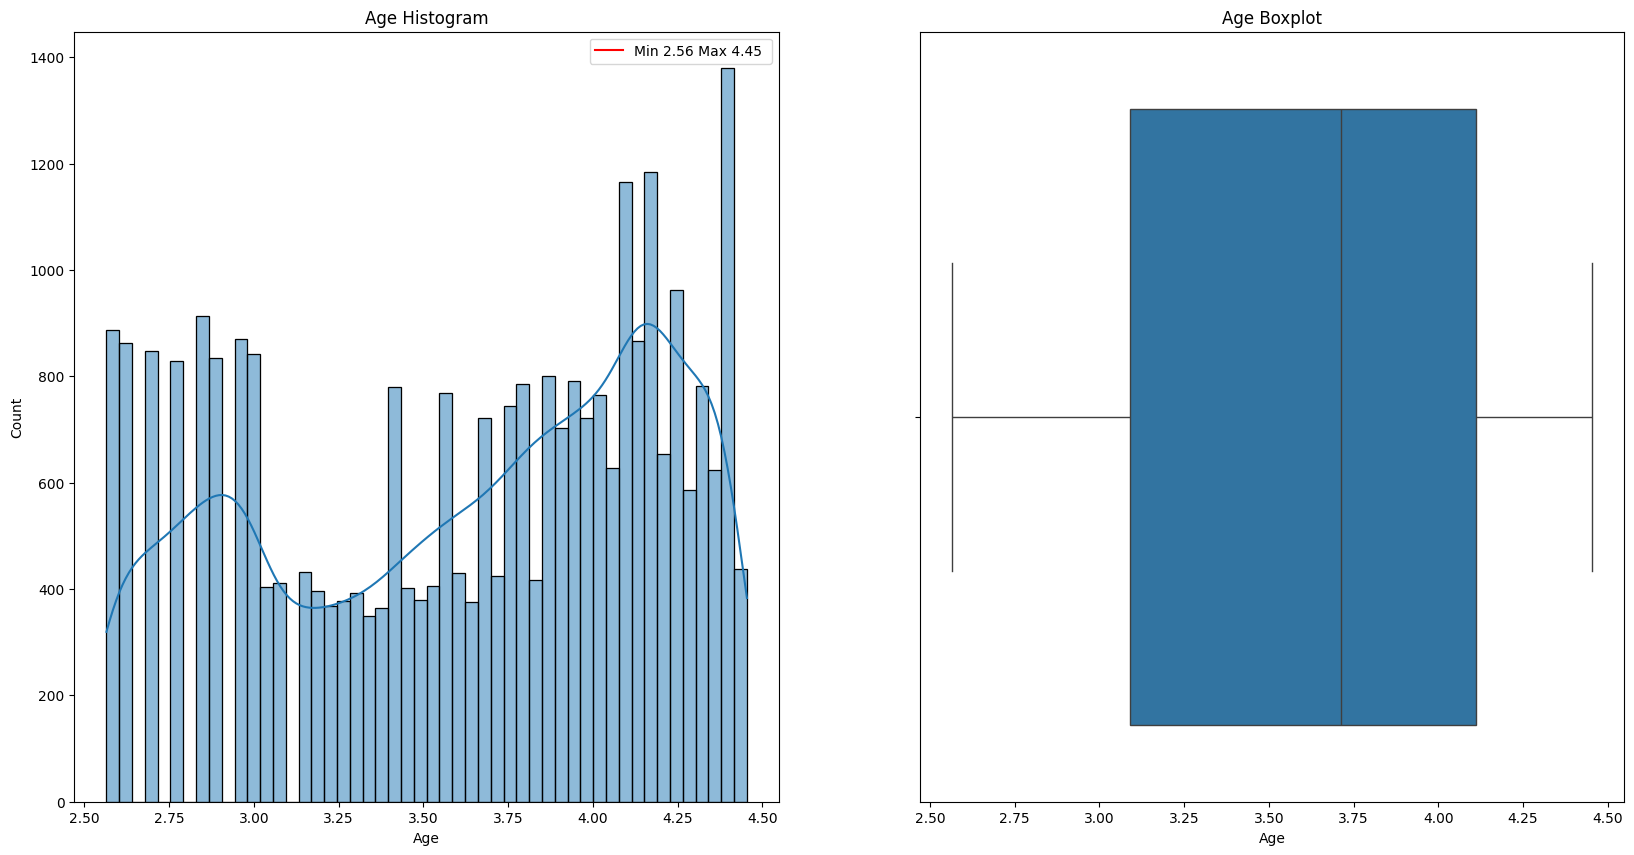

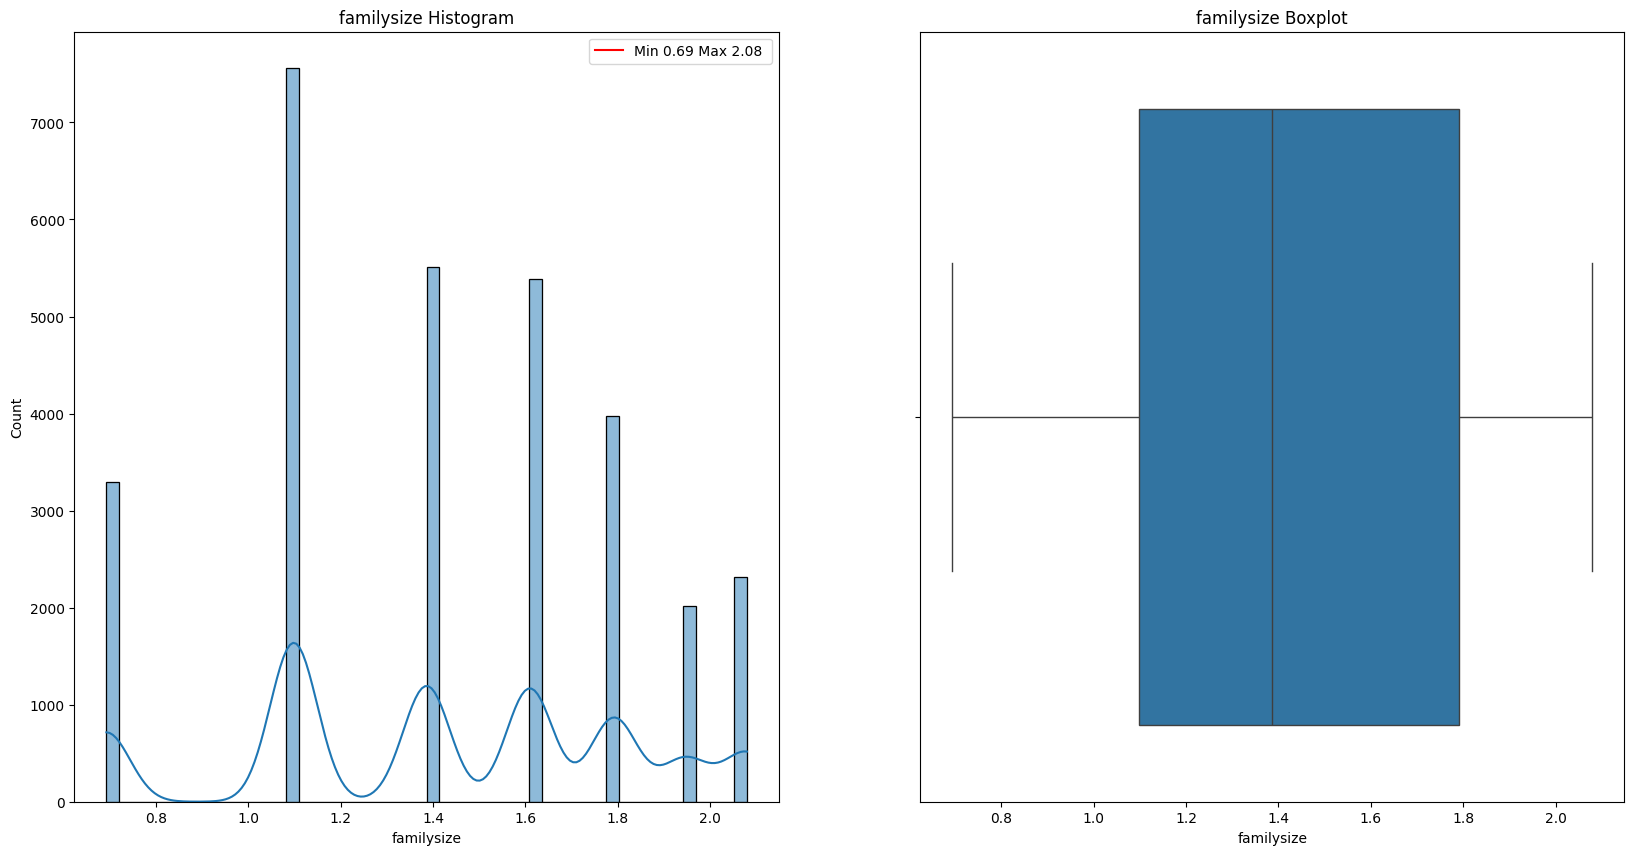

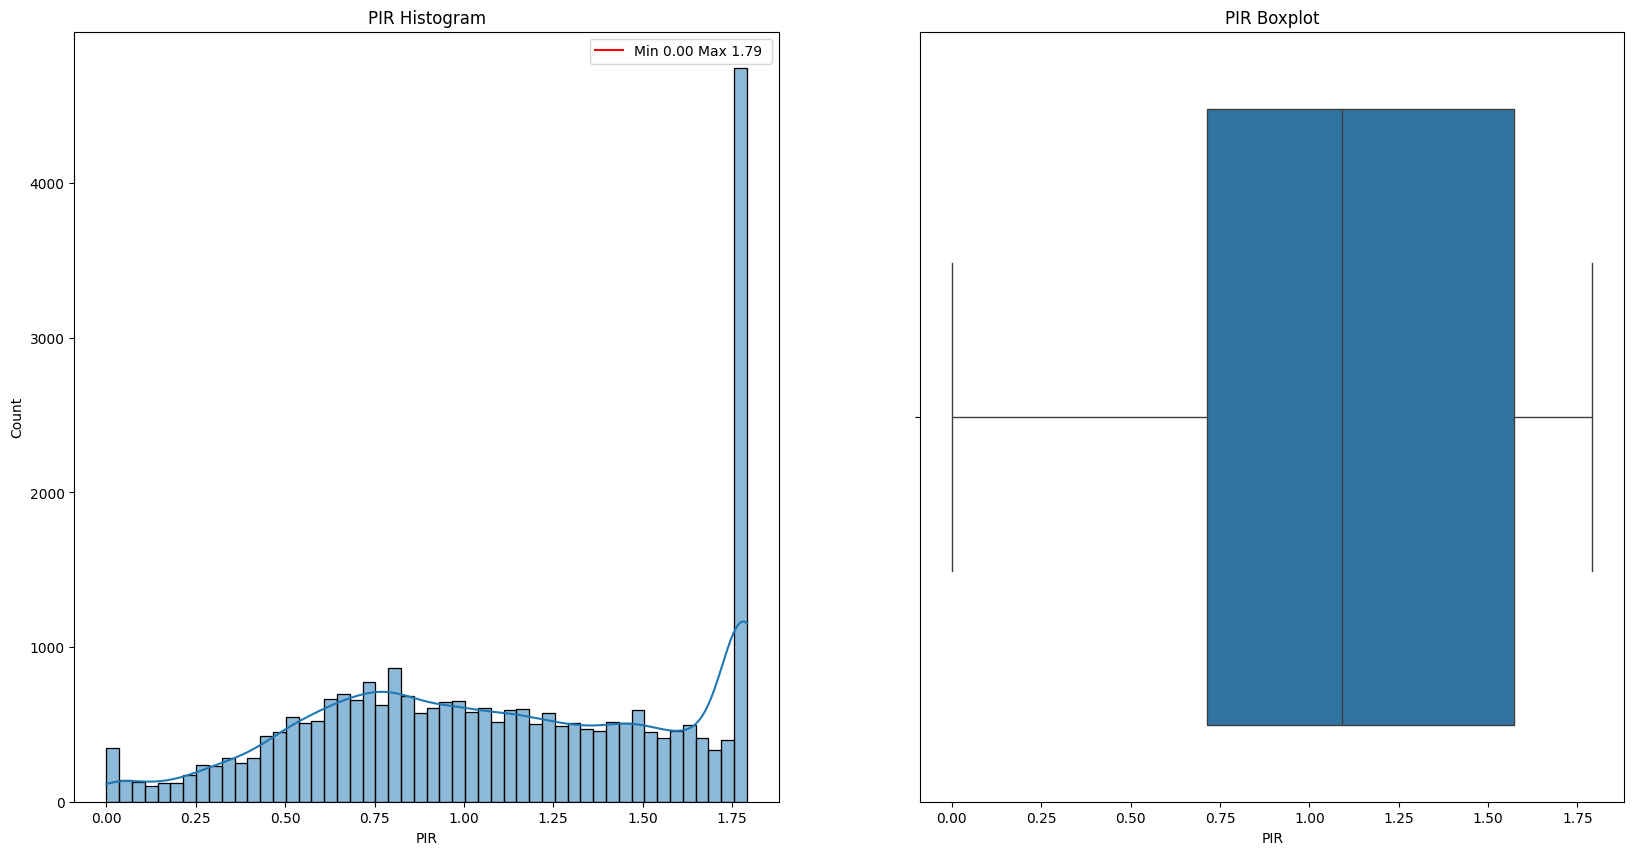

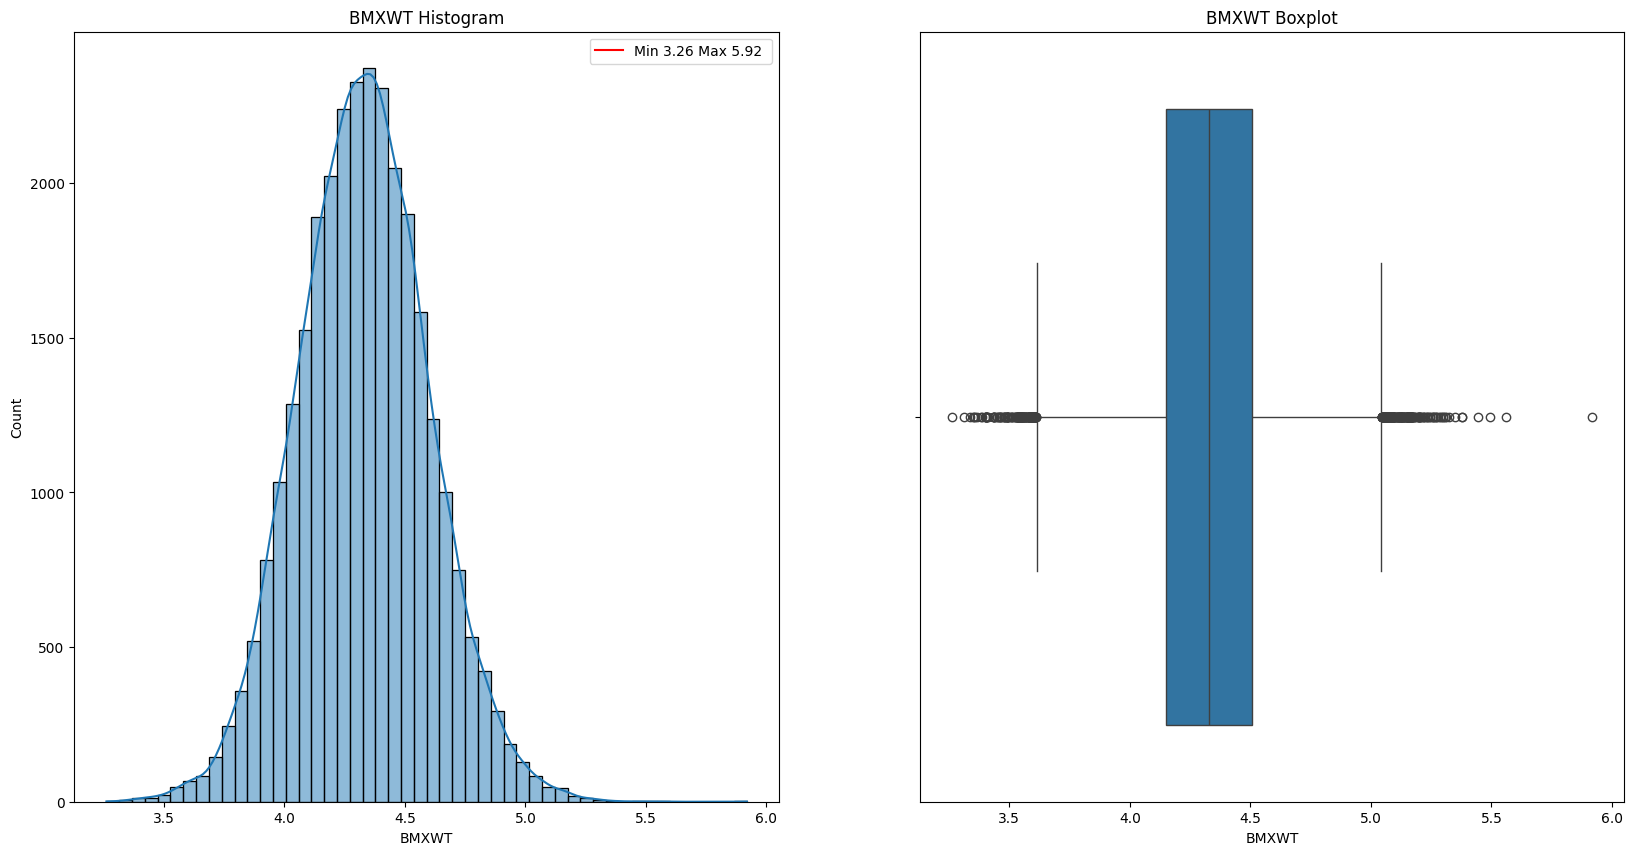

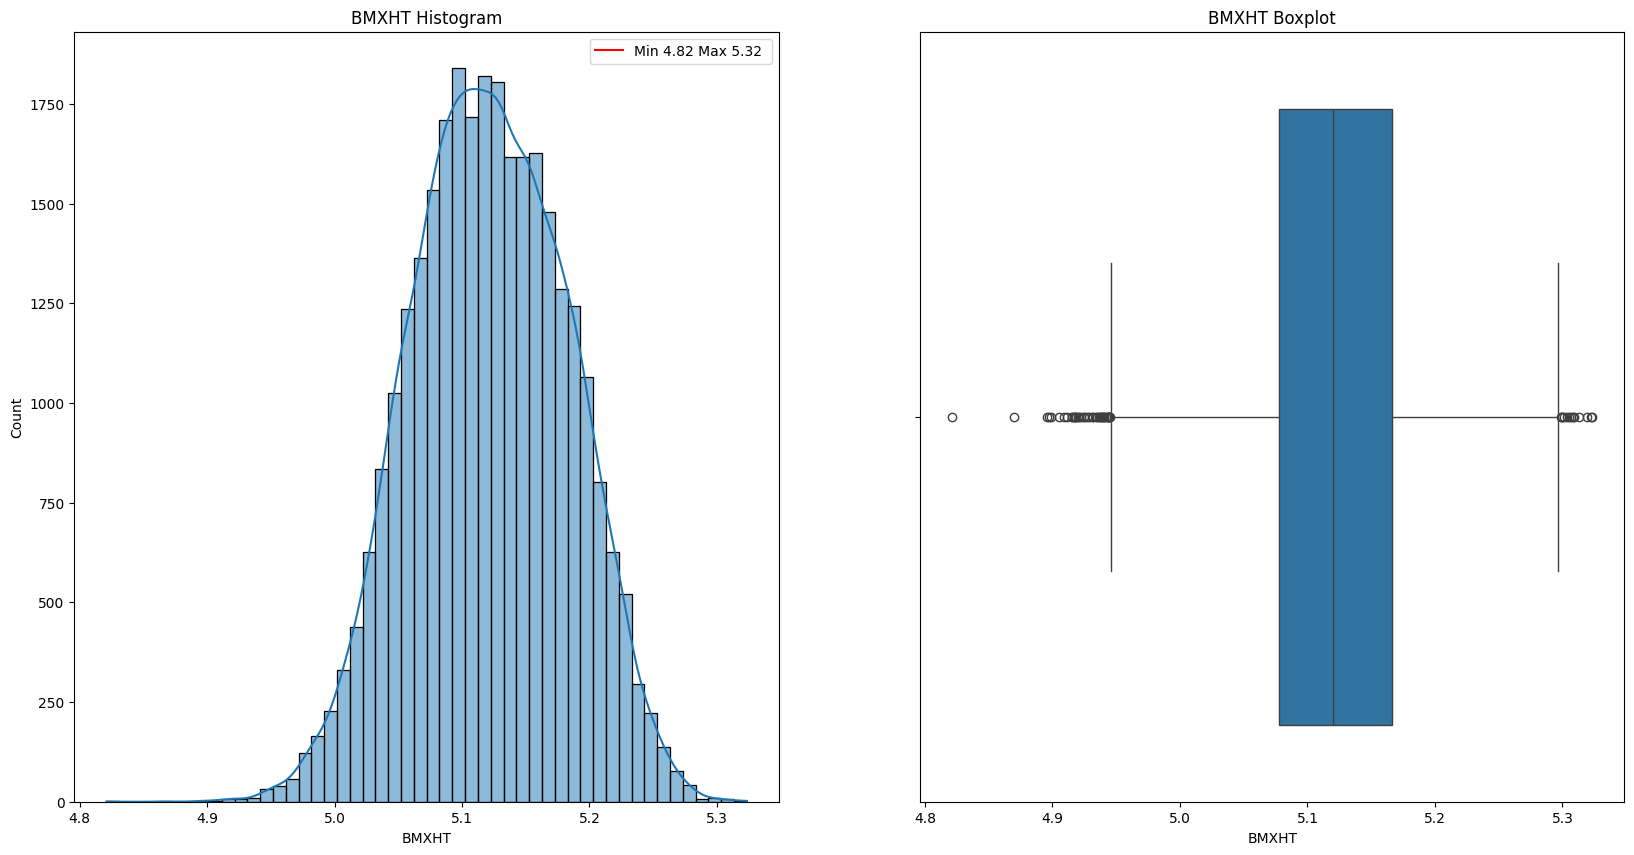

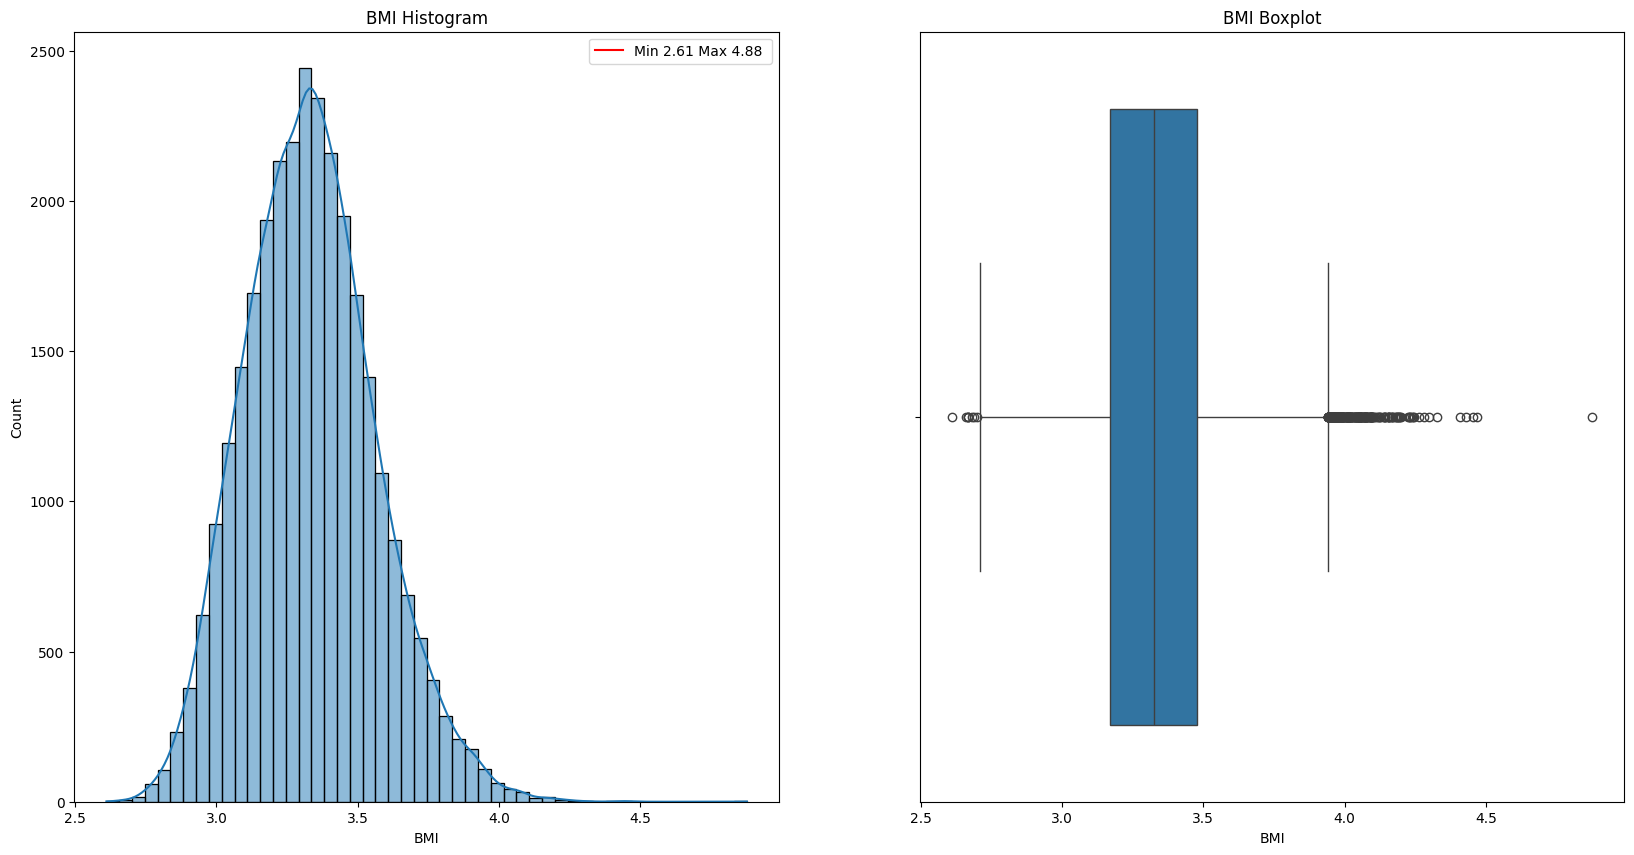

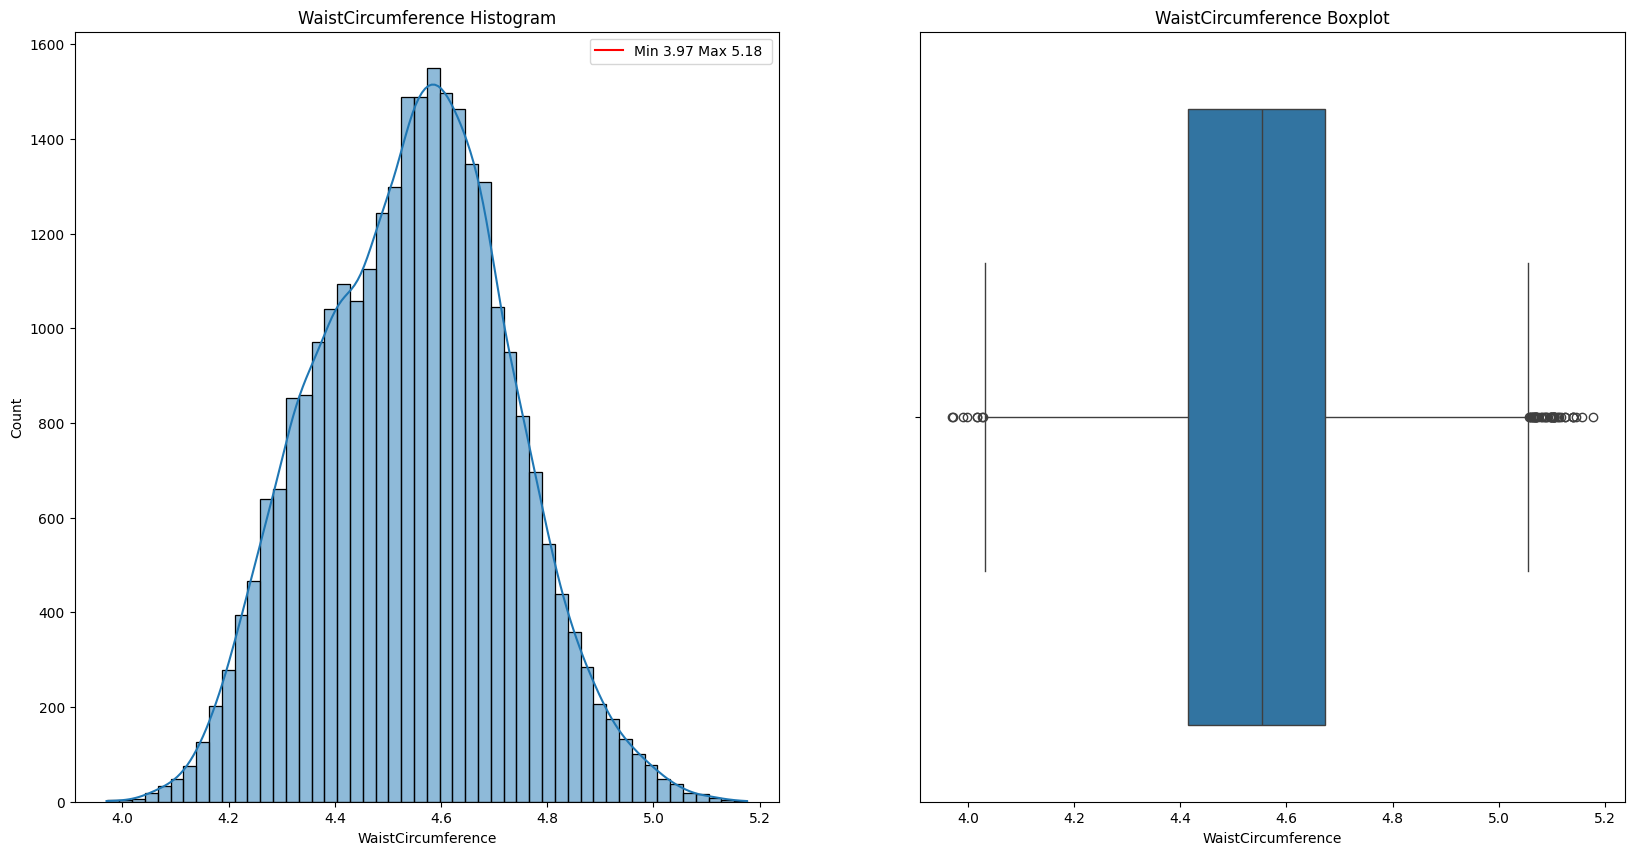

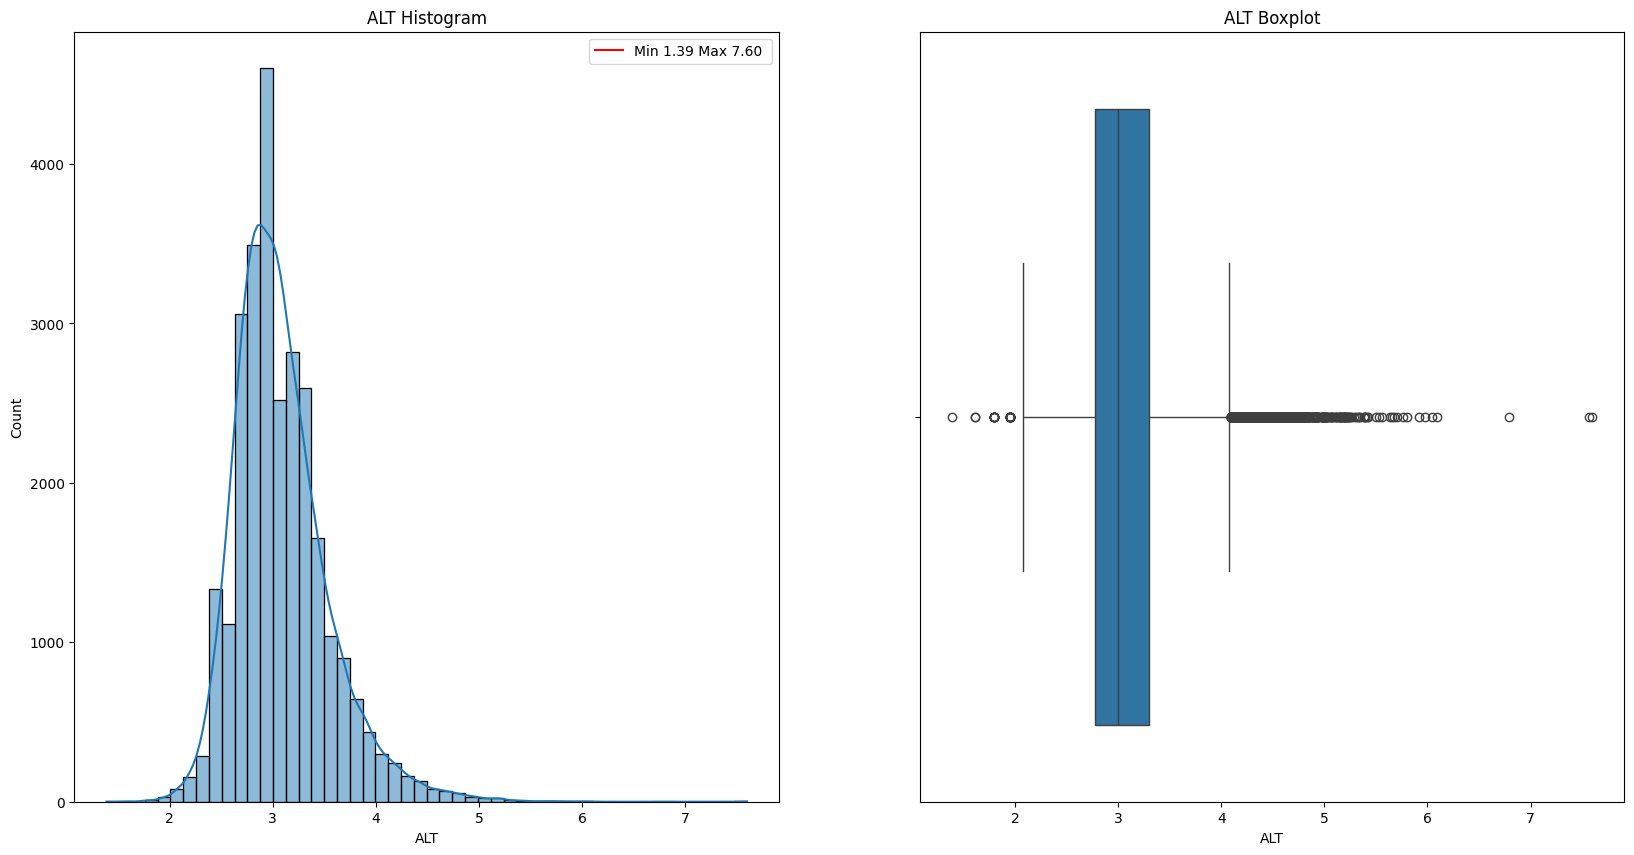

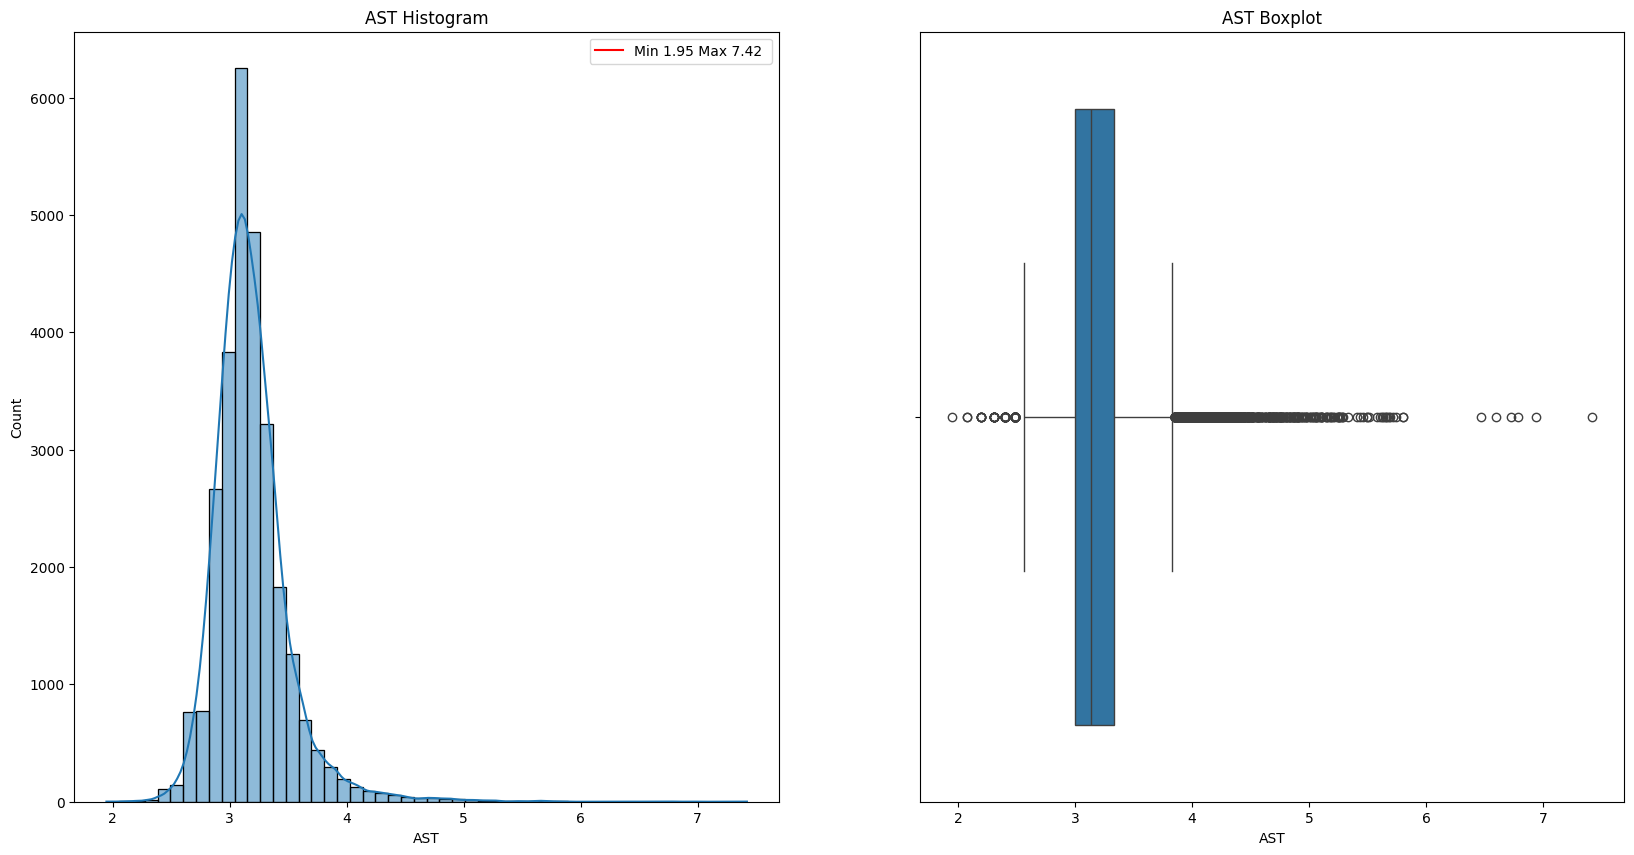

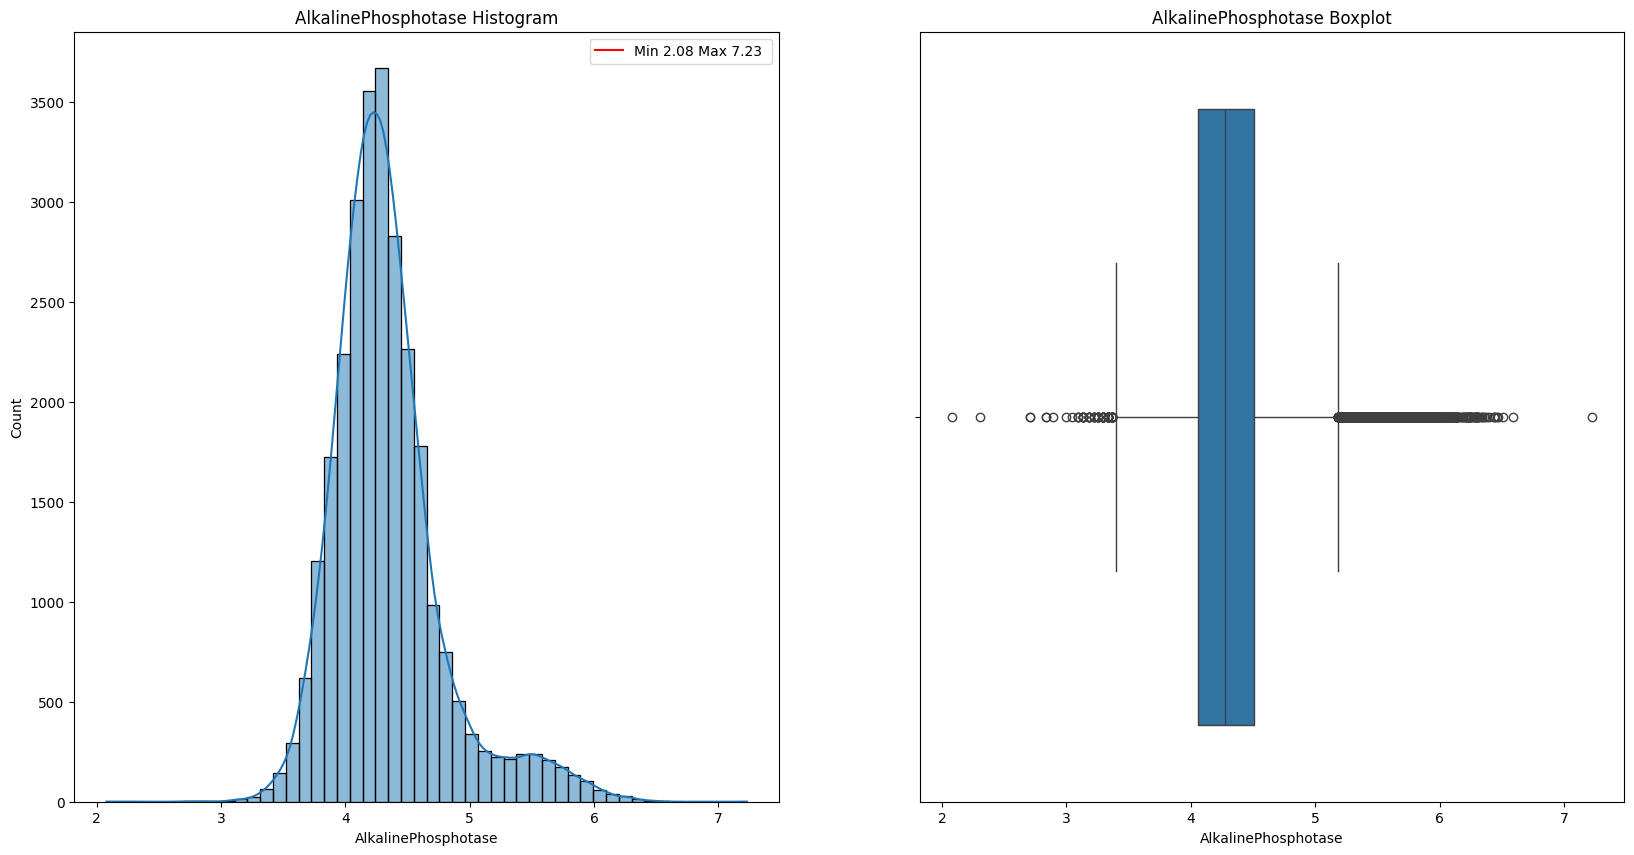

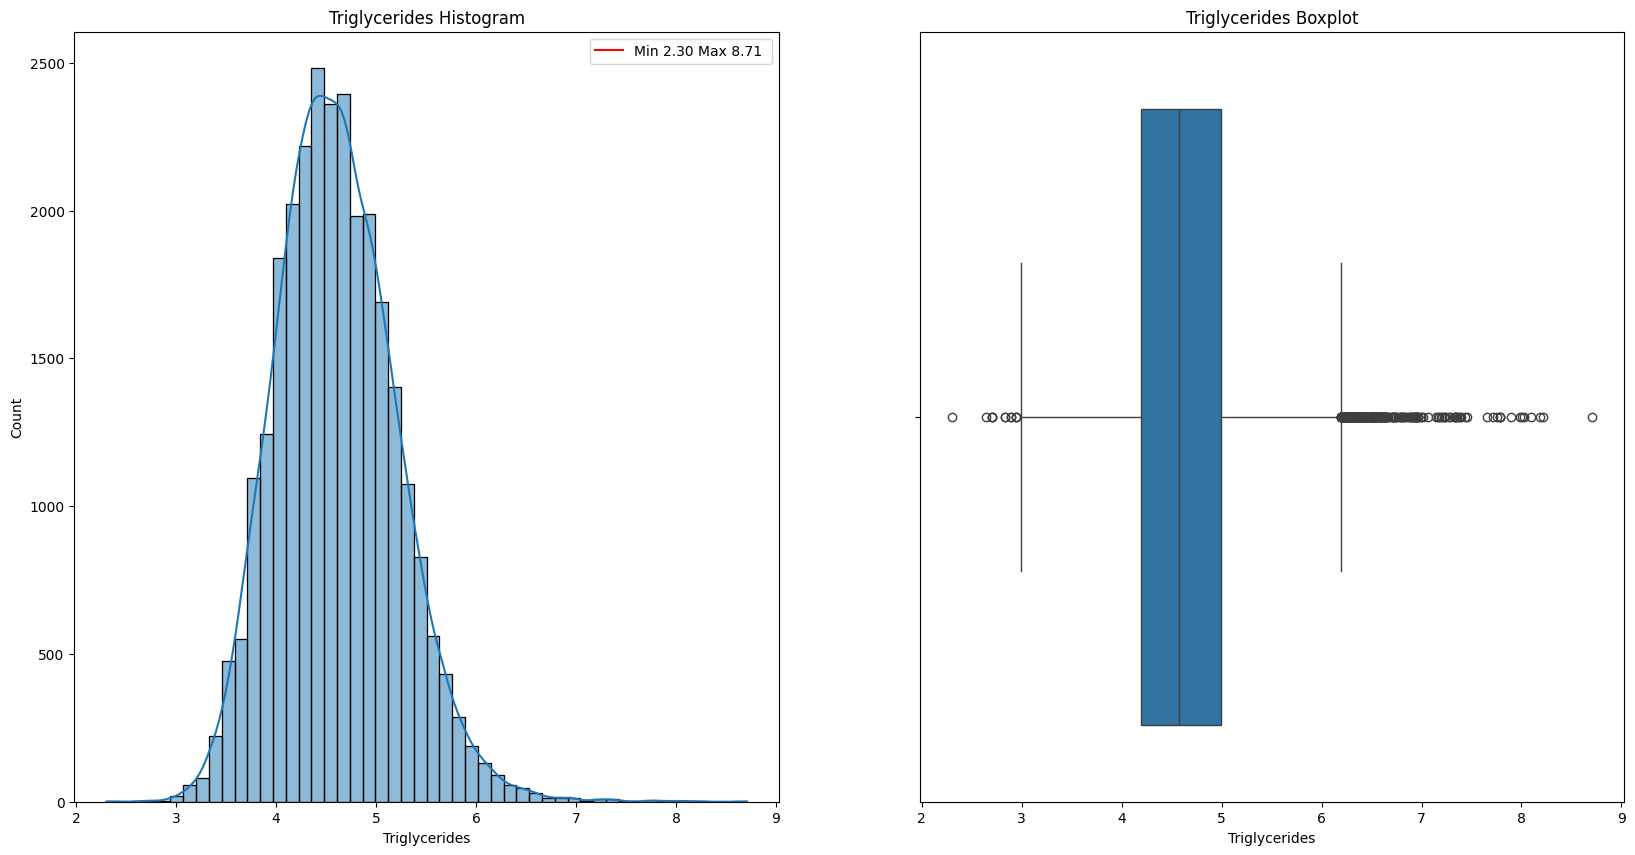

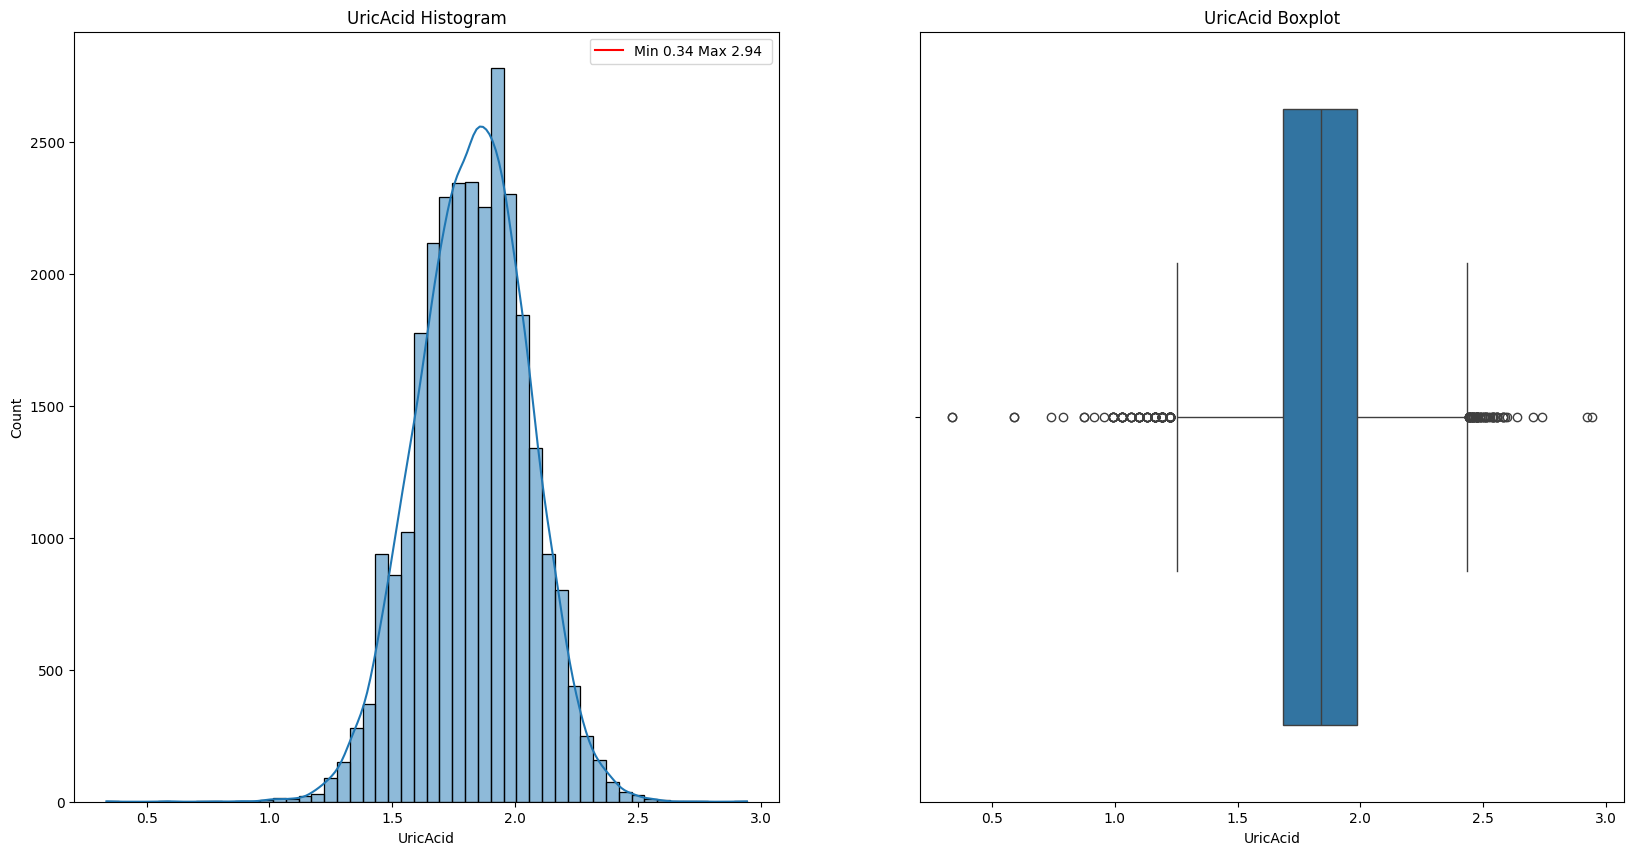

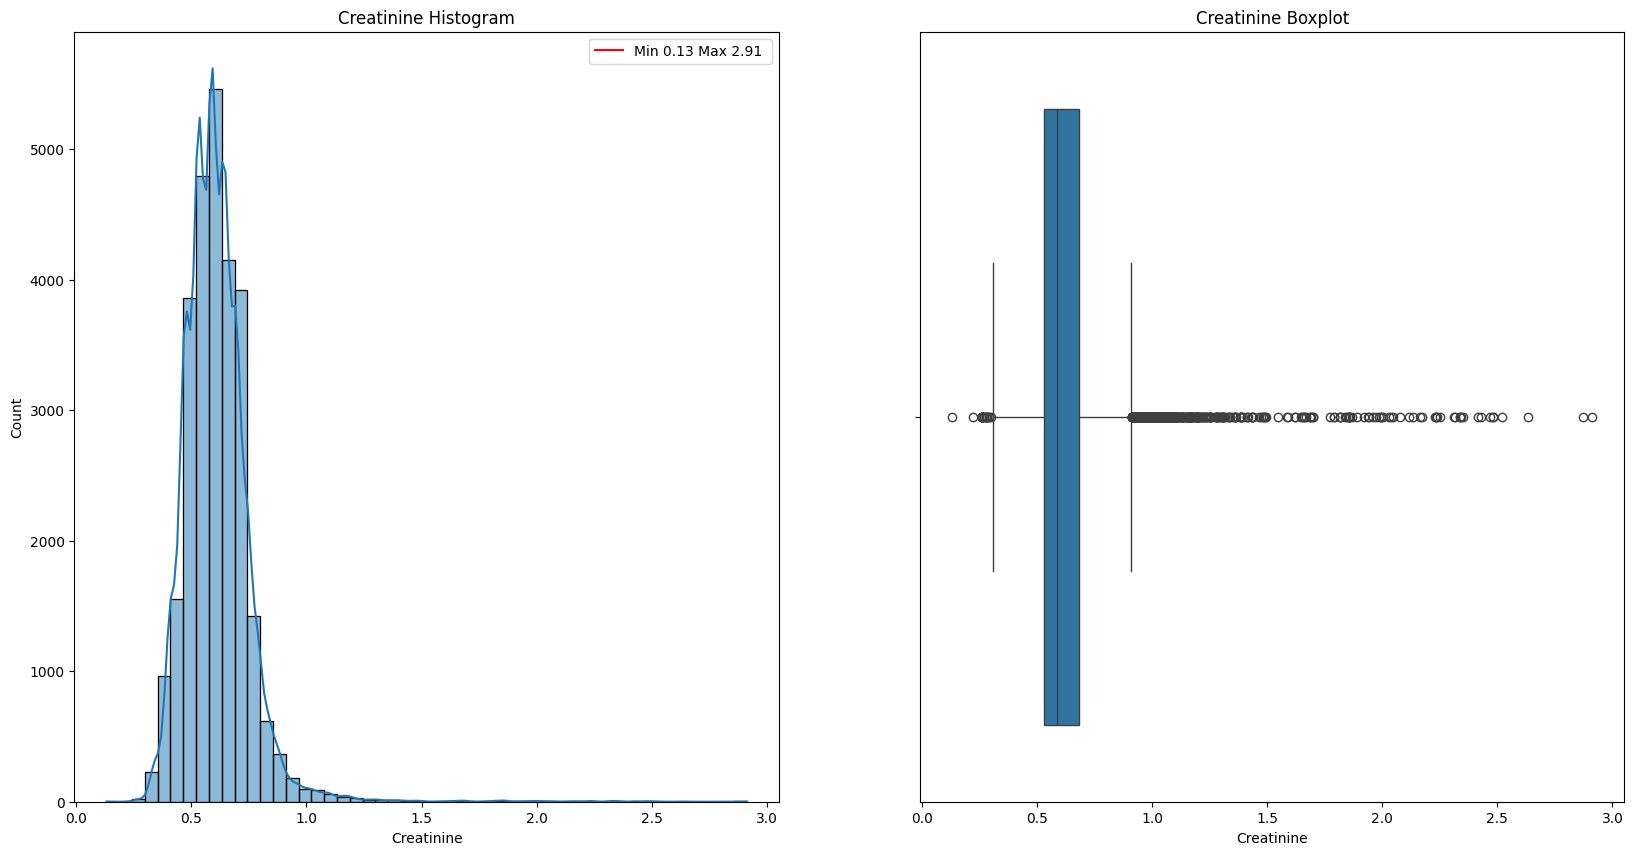

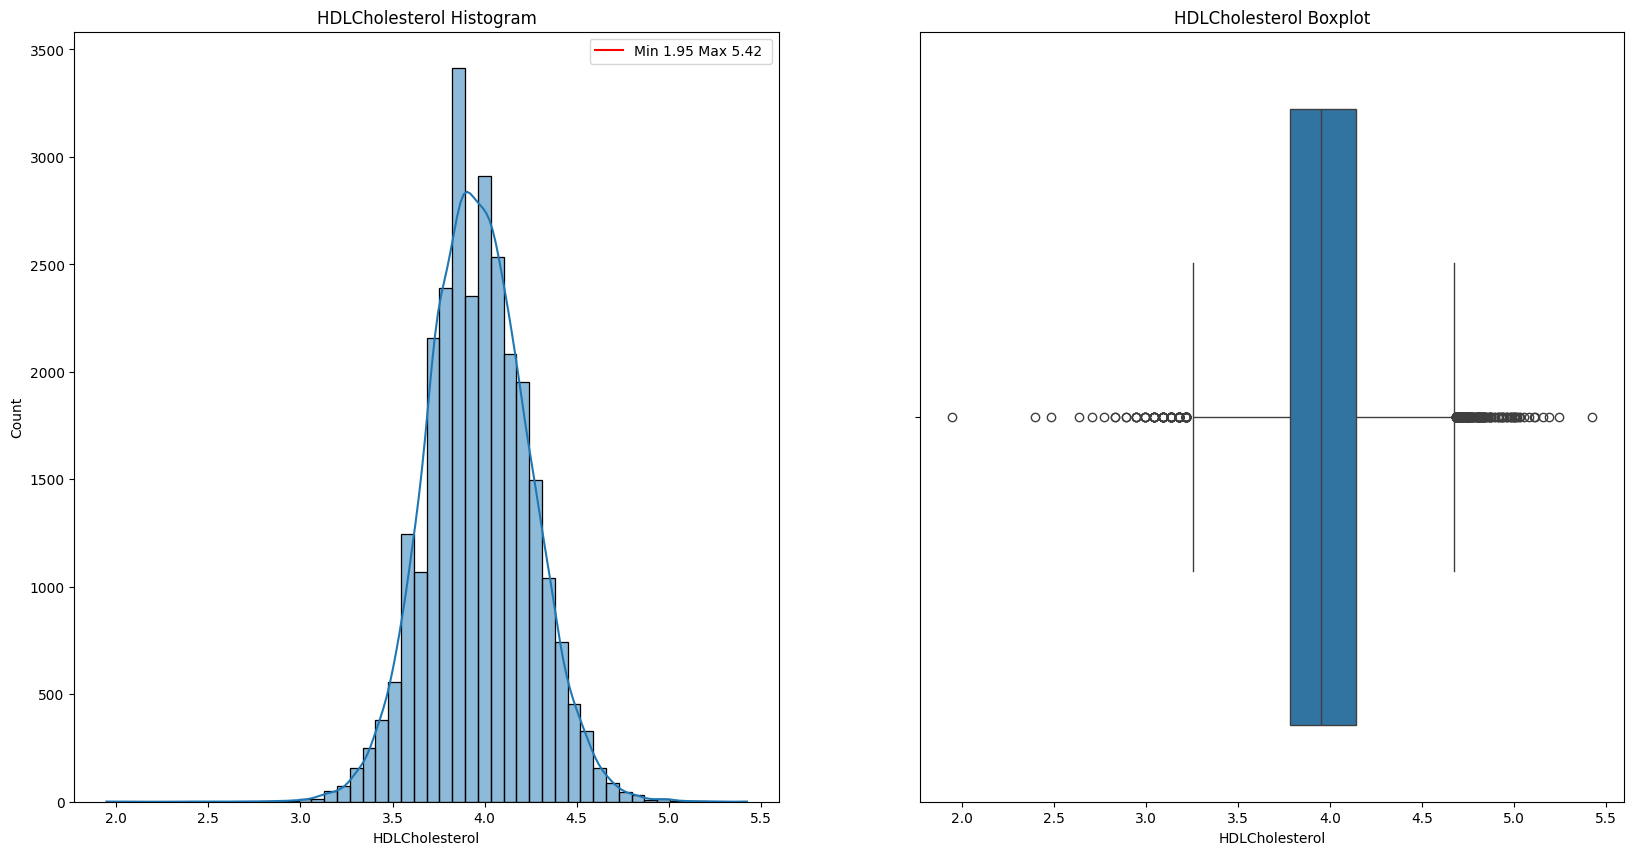

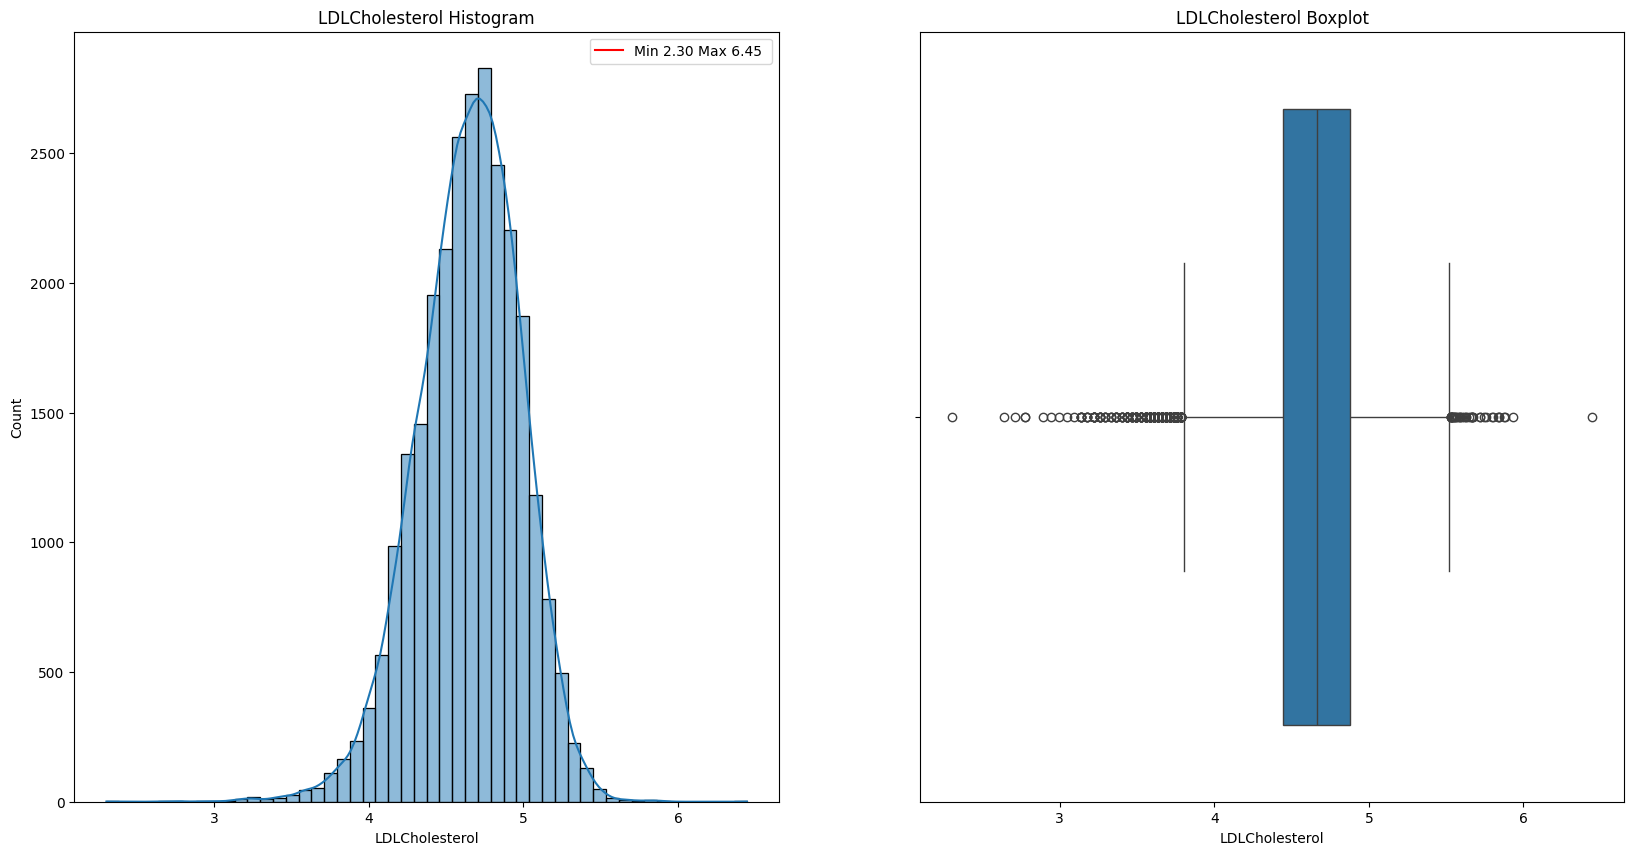

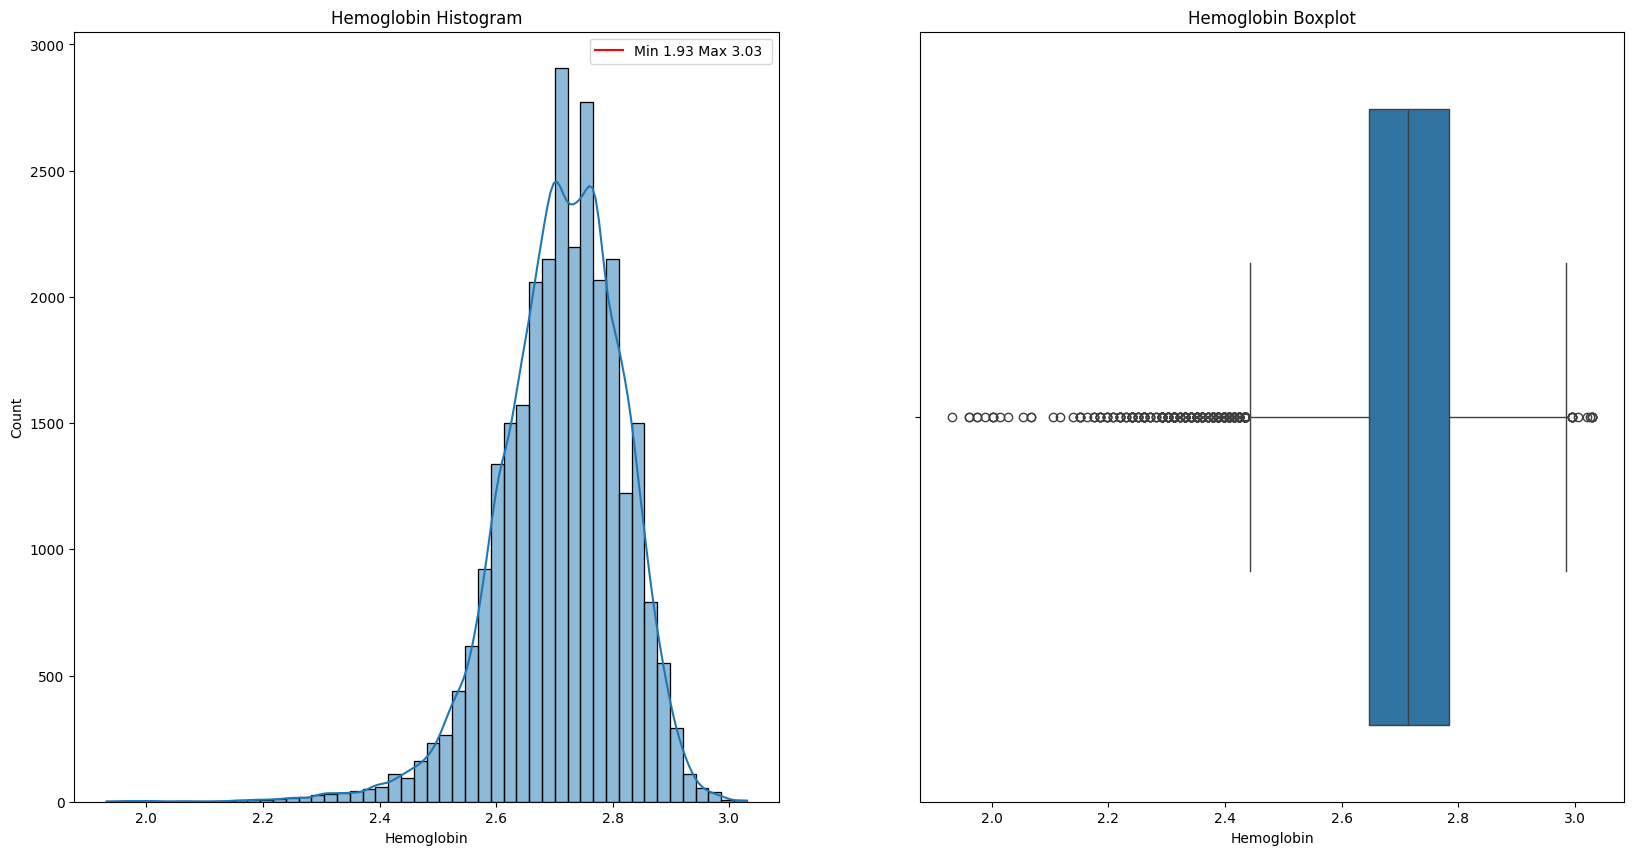

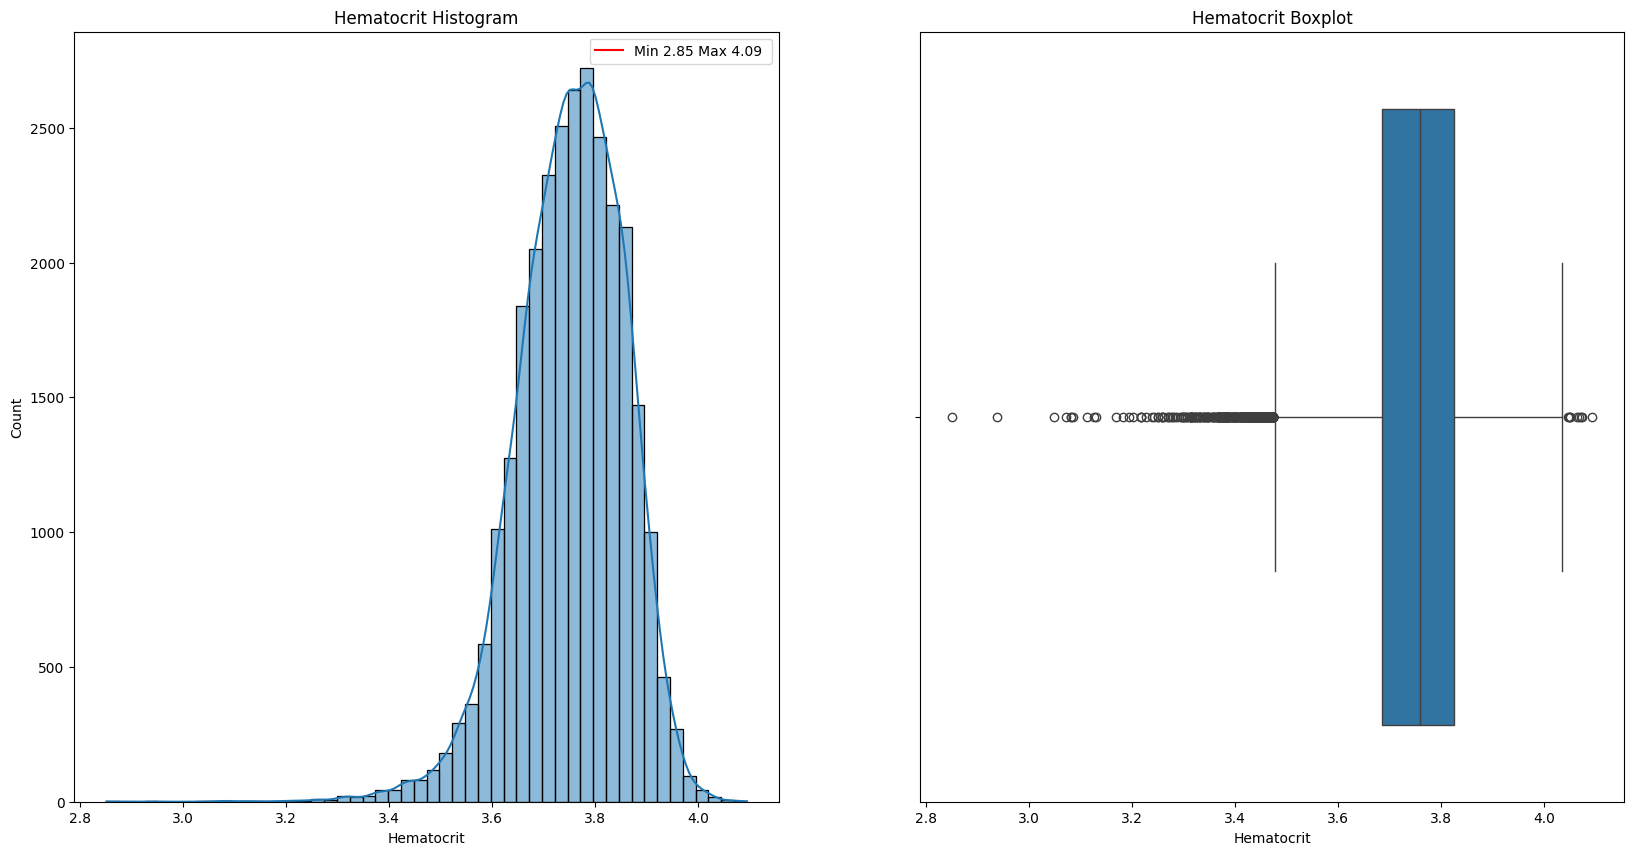

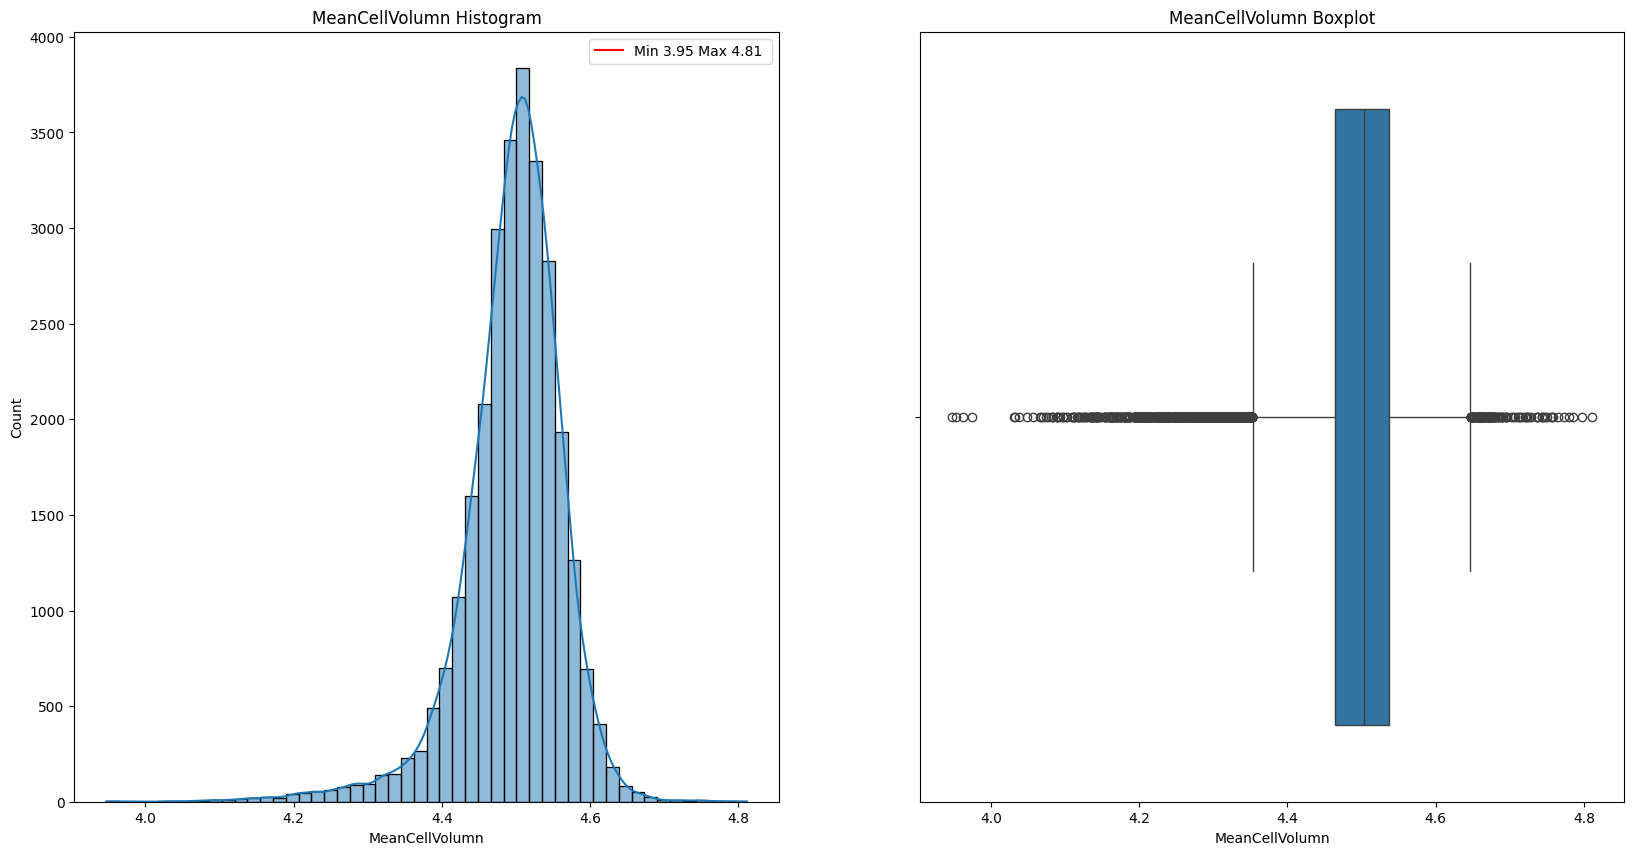

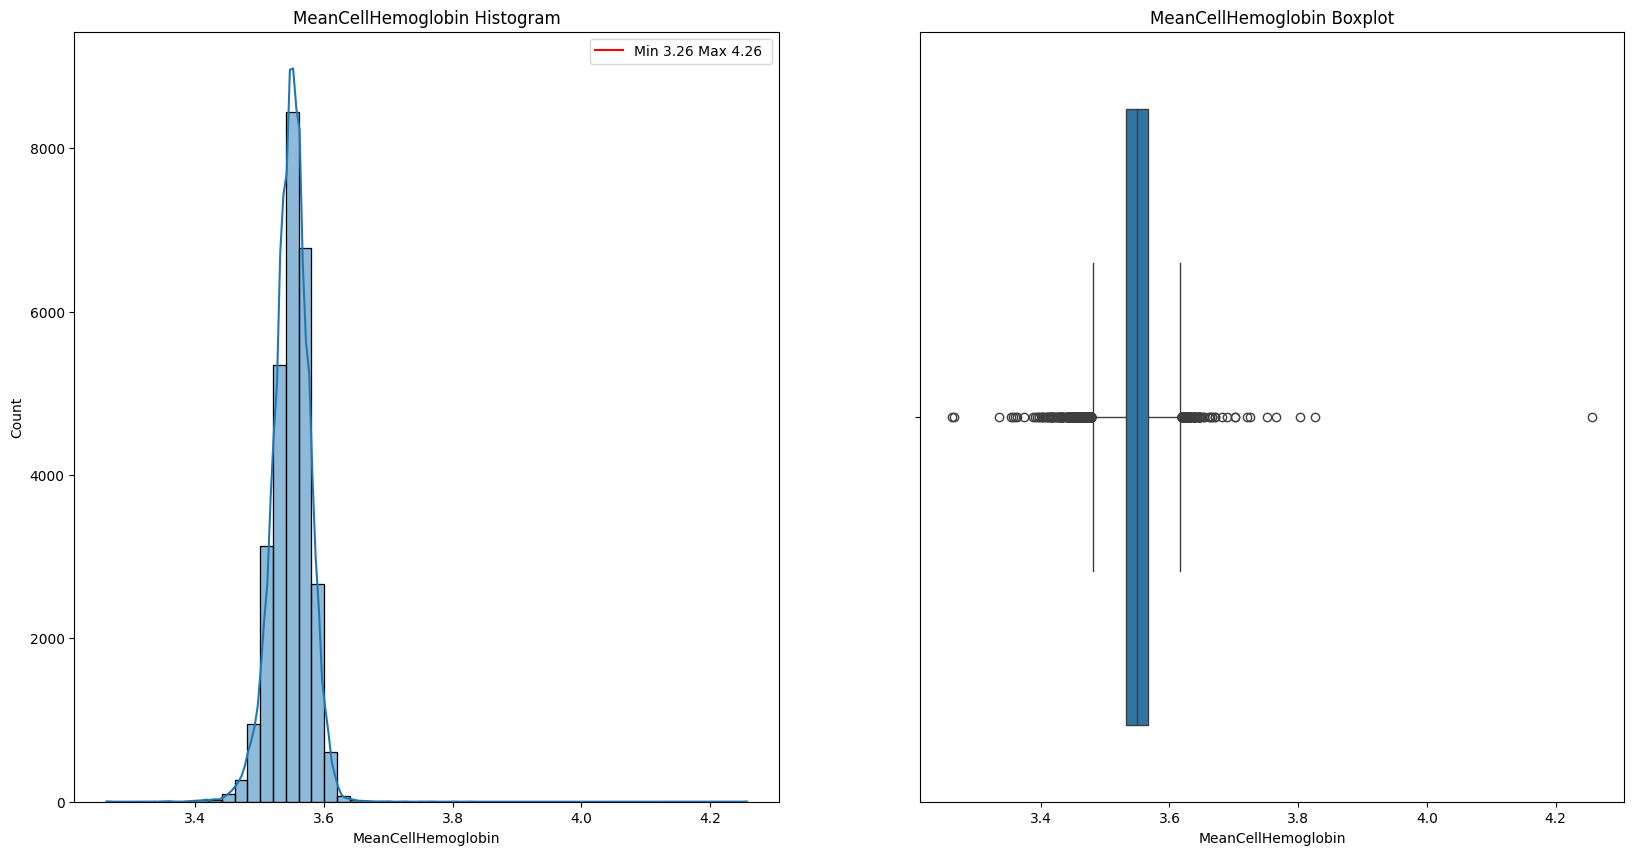

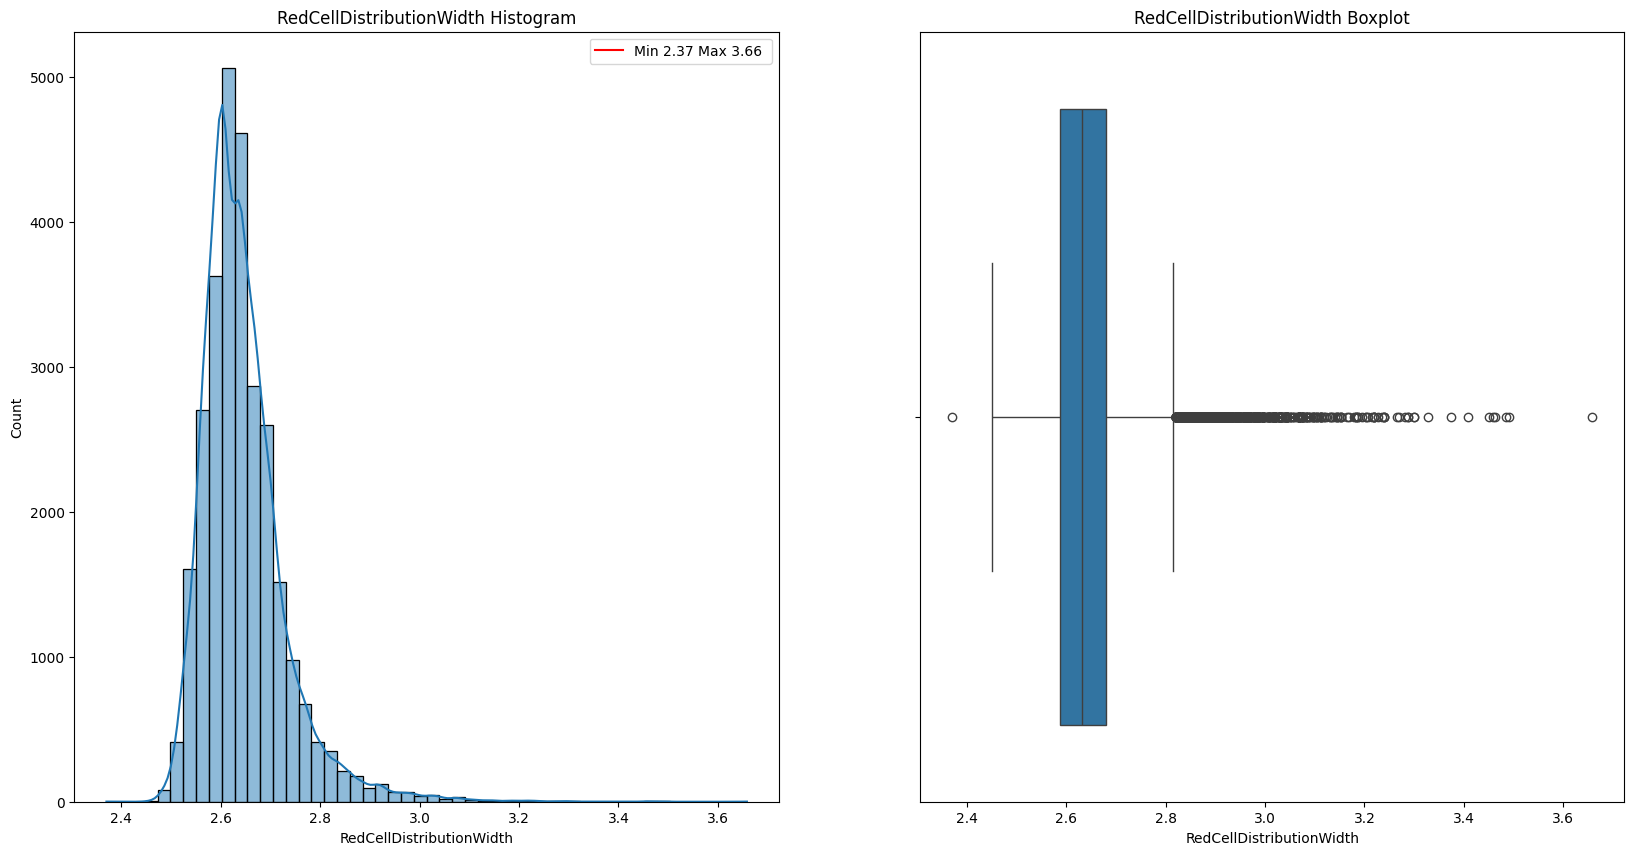

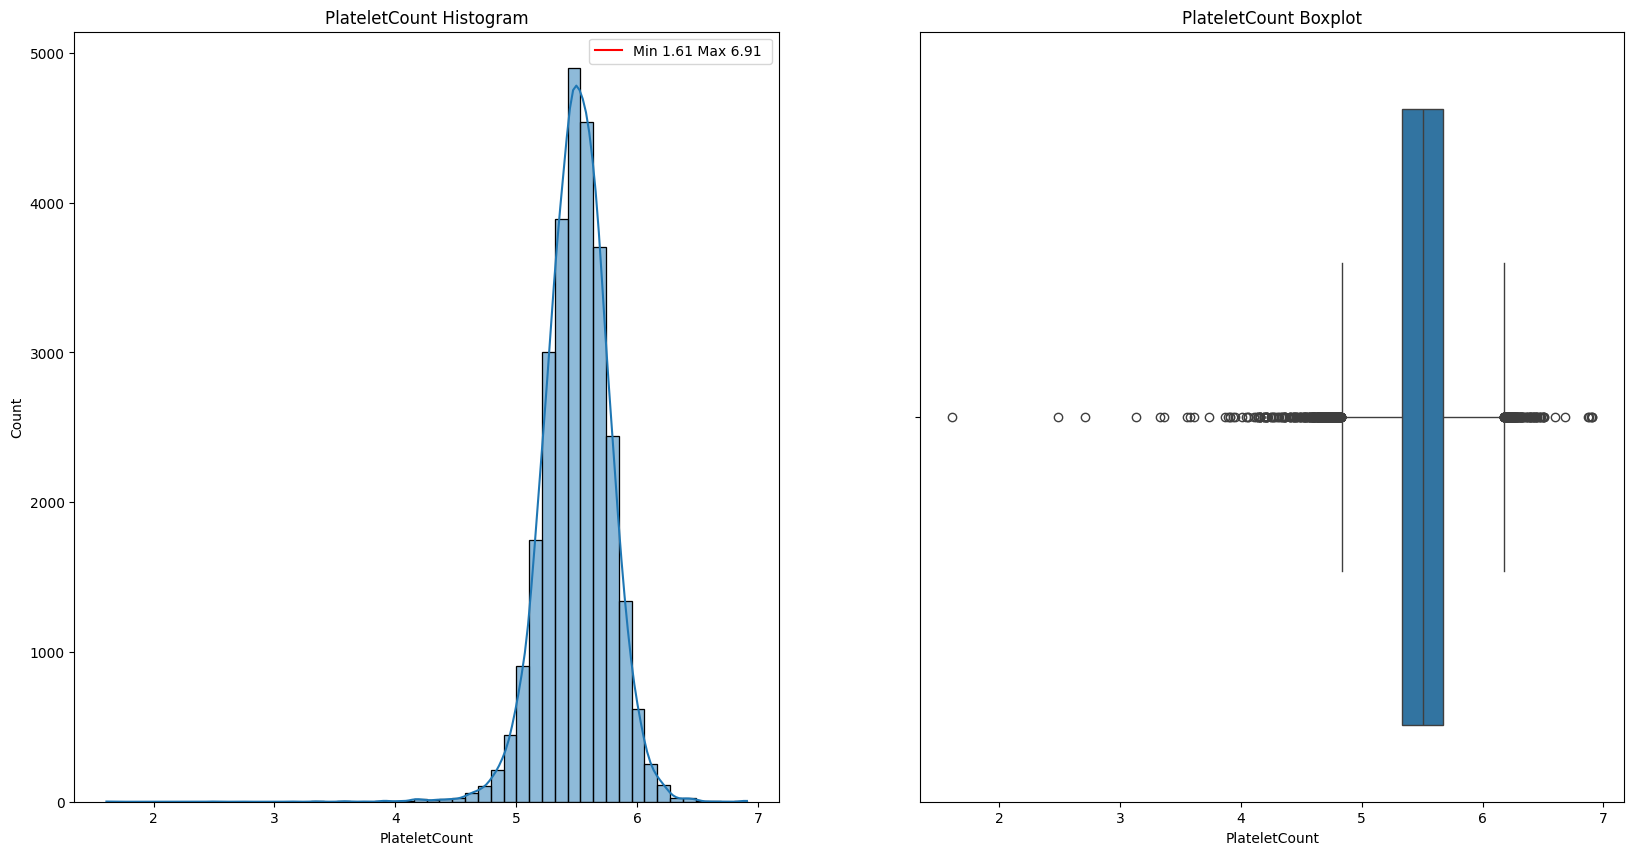

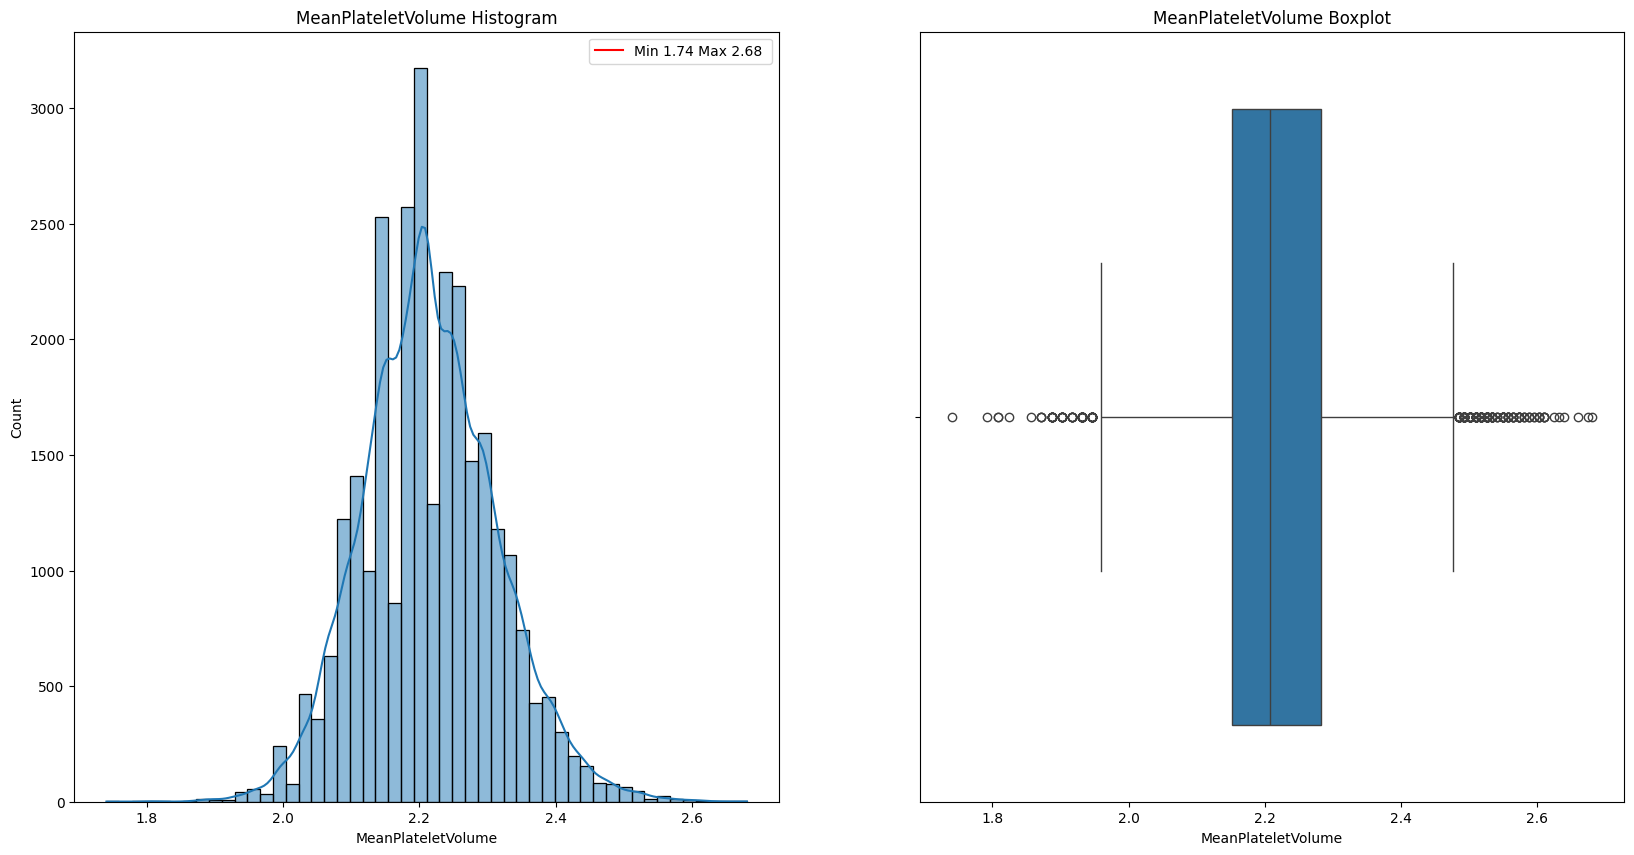

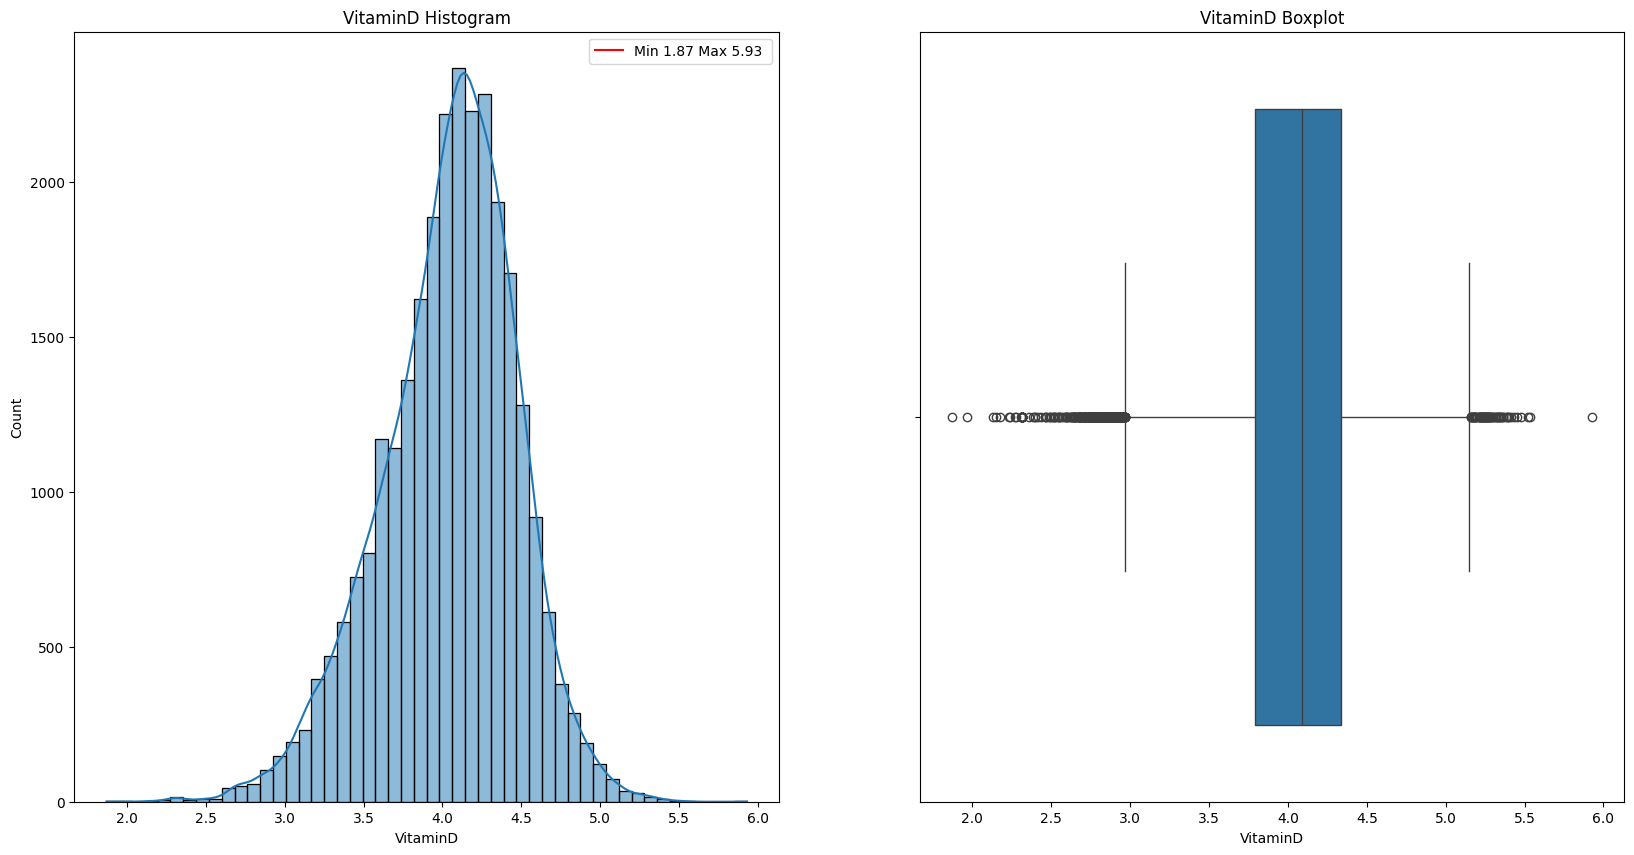

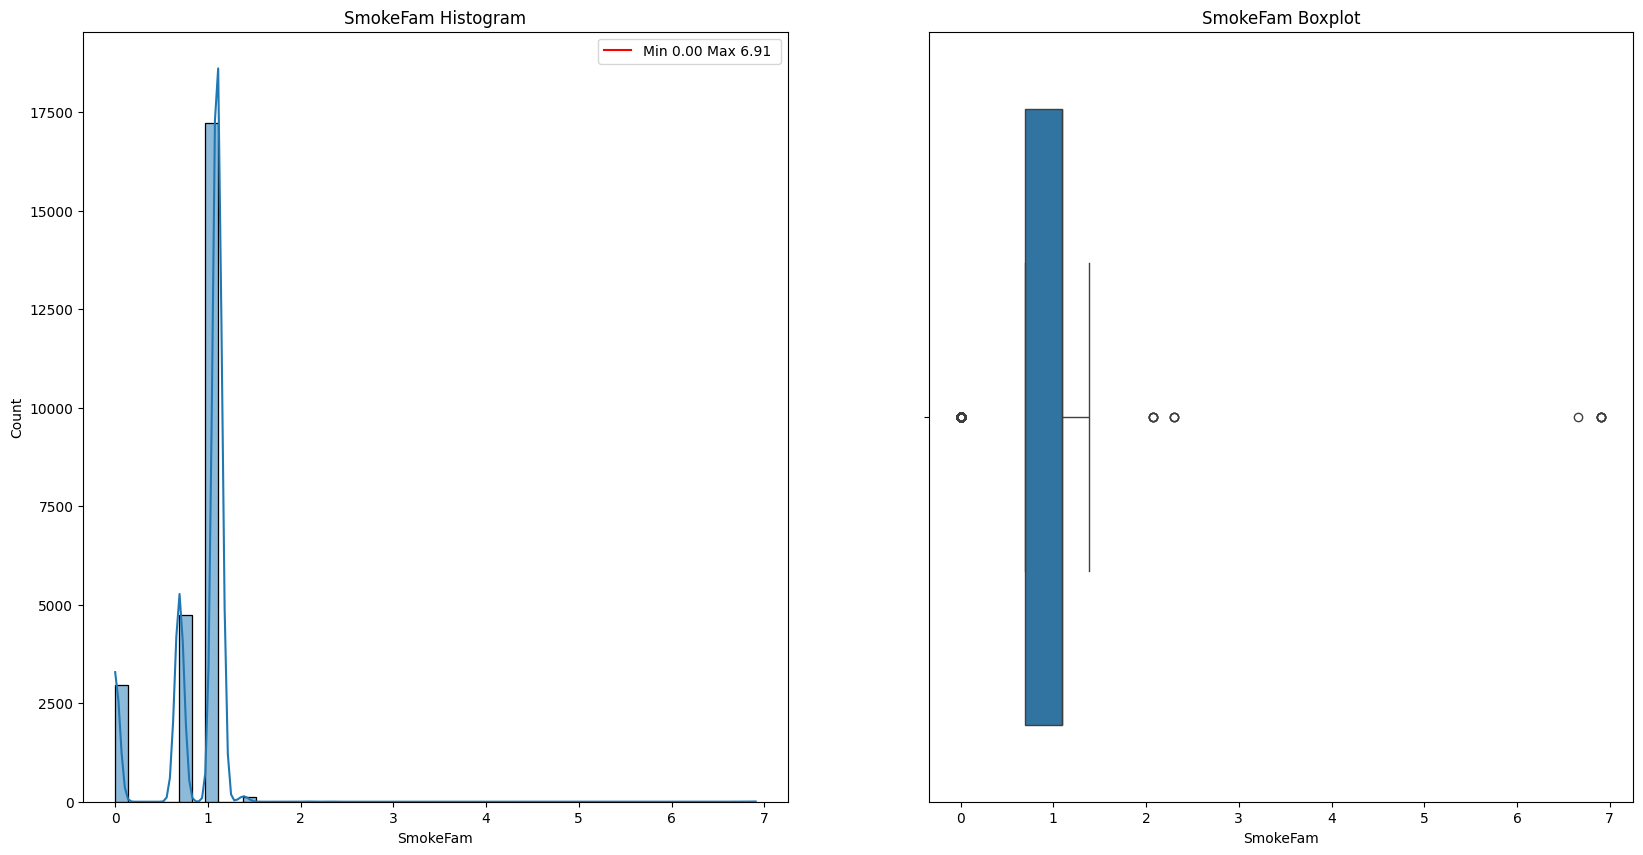

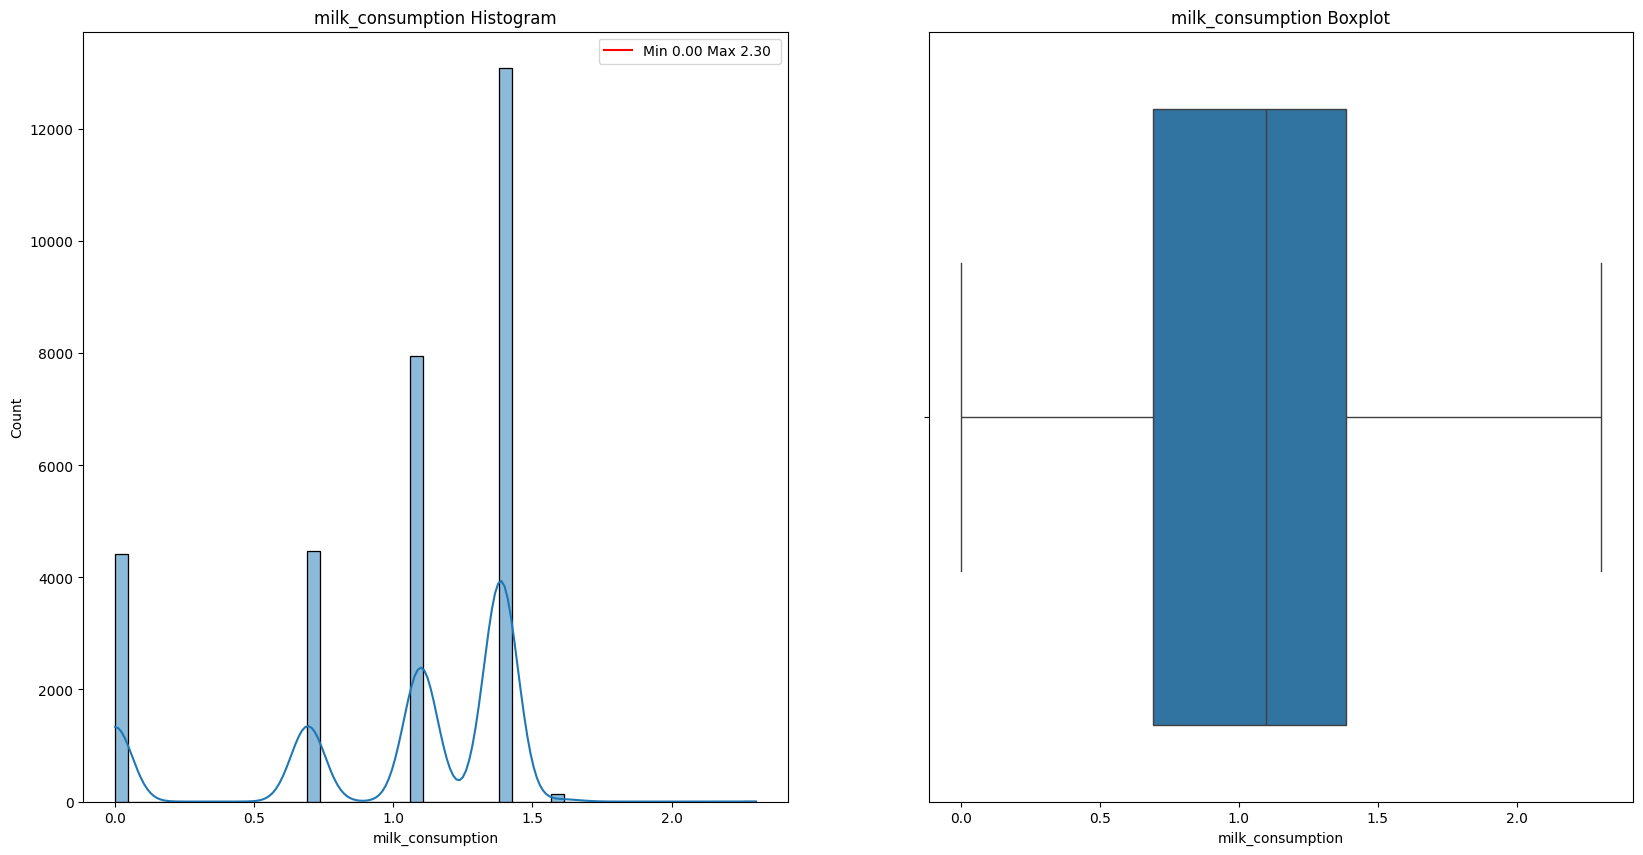

In [36]:
df_scaled = df_dq.copy()
df_scaled.drop(columns=[
                    'Gender', 'Race', 'FastingGlucose',
                    'Cholesterol', 'CreatinineUmol'
                ], inplace=True)
df_scaled = df_scaled.apply(lambda x: np.log1p(x))

for col in df_scaled.columns:
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    sns.histplot(df_scaled[col], bins=50, kde=True)
    plt.plot([], [], label = f"Min {df_scaled[col].min():.2f} Max {df_scaled[col].max():.2f} ", color='red')
    plt.legend()
    plt.title(f"{col} Histogram")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_scaled[col])
    plt.title(f"{col} Boxplot")

    plt.show()

### Data quality

#### 1. Completeness

##### 1.1 Measure for each features

In [37]:
# Loop through each column and check for missing values for each column
def check_missing_ratio(df_check):
    ratio_completeness = []
    for column in df_check.columns:
        completeness_ratio = df_check[column].notnull().sum() / len(df_check)
        ratio_completeness.append(completeness_ratio)

    # # Draw ratio
    # plt.figure(figsize=(20, 10)) # type: ignore
    # plt.title("Completeness Ratio")
    # ax = sns.barplot(y=df_check.columns, x=ratio_completeness, palette='viridis')

    # for i, rec in enumerate(ax.patches):
    #     ax.text(
    #         rec.get_x() + rec.get_width(),
    #         rec.get_y() + rec.get_height()/2,
    #         f'{ratio_completeness[i]:.2%}',
    #     )
    plt.figure(figsize=(20, len(df_check.columns) * 0.4))  # Dynamically adjust height
    plt.title("Completeness Ratio")
    ax = sns.barplot(x=ratio_completeness, y=df_check.columns, palette='viridis')

    for i, rec in enumerate(ax.patches):
        ax.text(
            rec.get_width() + 0.01,  # Move text slightly right of bar
            rec.get_y() + rec.get_height() / 2,
            f'{ratio_completeness[i]:.2%}',
            va='center'
        )

    plt.tight_layout()
    plt.show()


C:\Users\iseT1enLoc\AppData\Local\Temp\ipykernel_30500\2180505098.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=ratio_completeness, y=df_check.columns, palette='viridis')


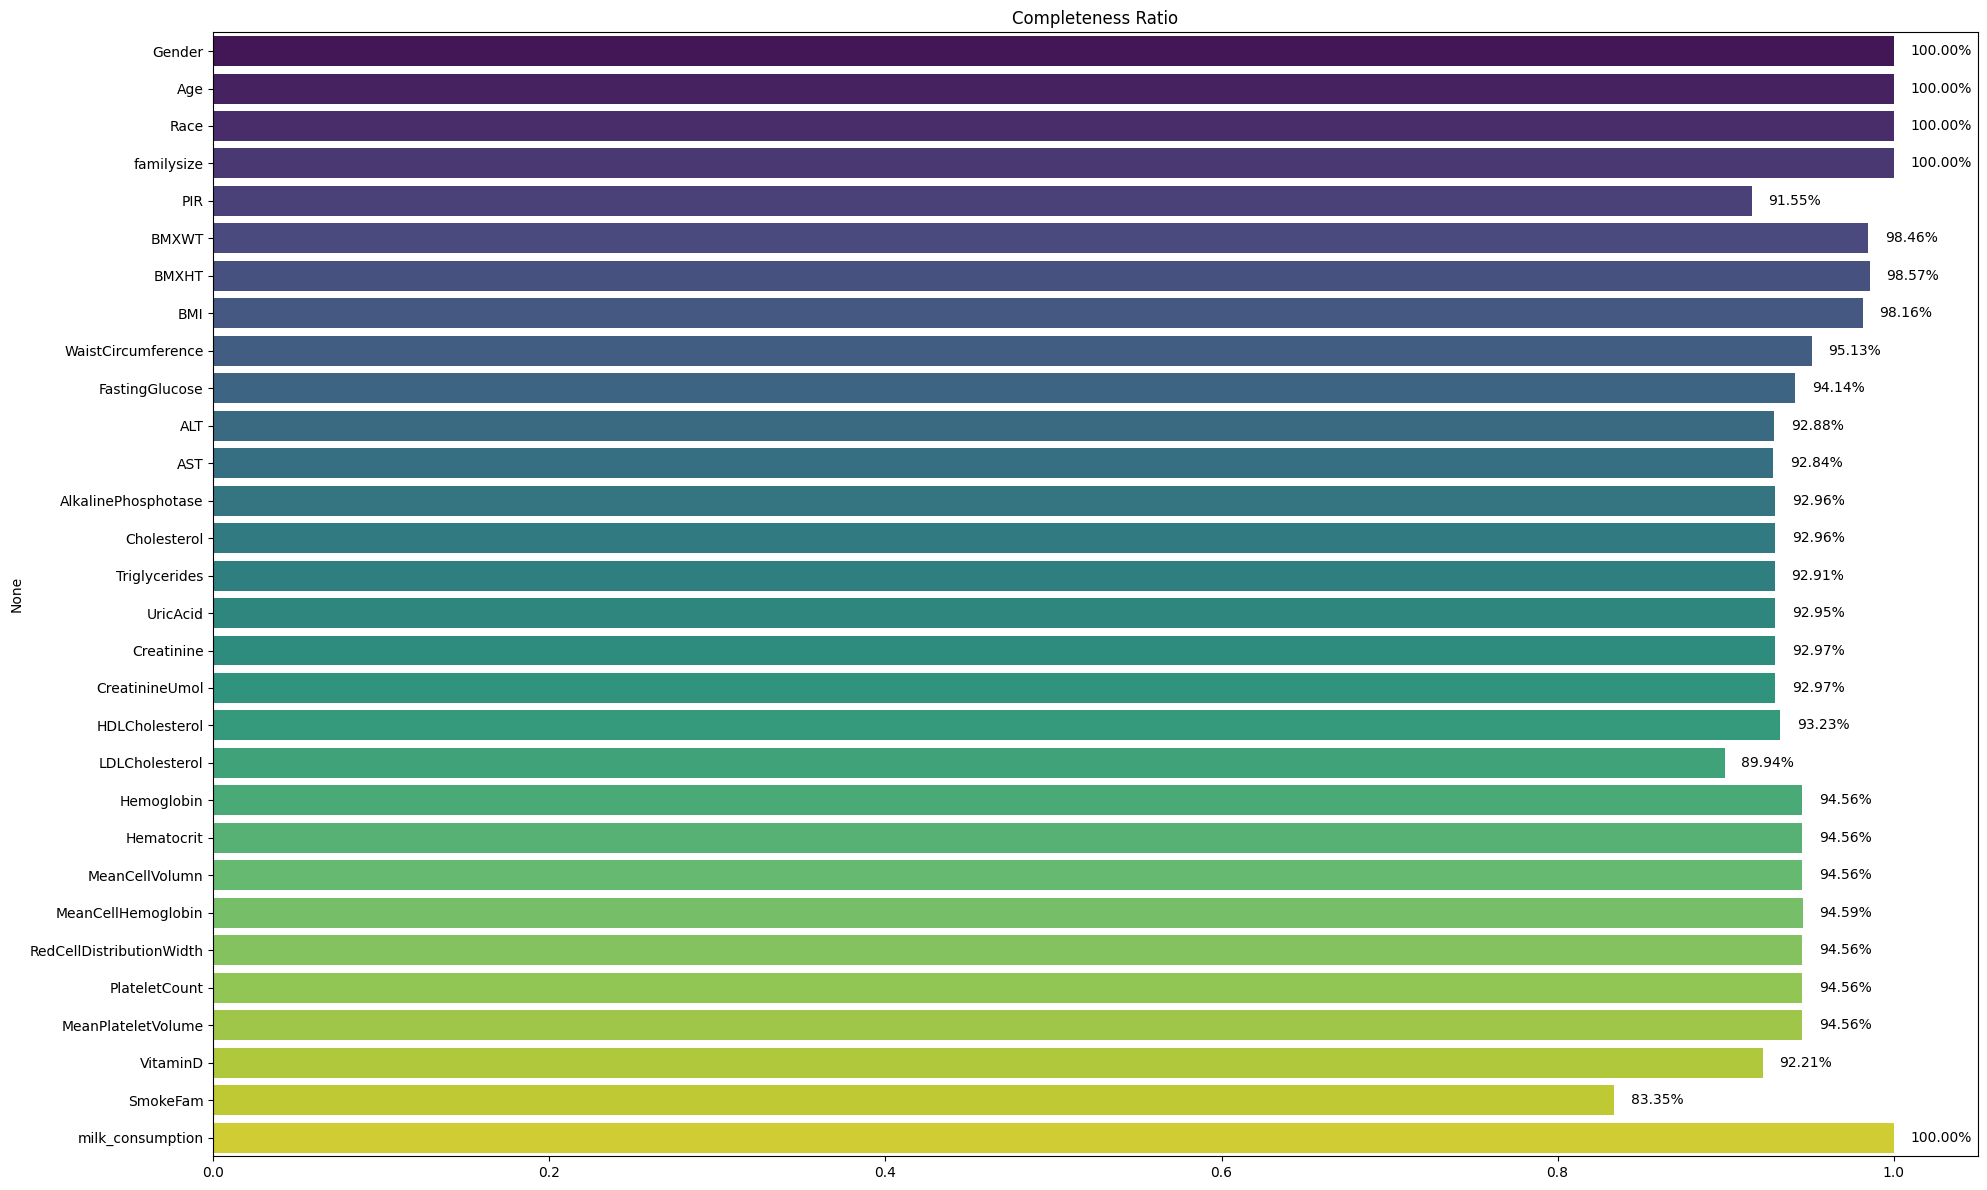

In [27]:
check_missing_ratio(df_dq)

In [28]:
df_dq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30065 entries, 0 to 30064
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    30065 non-null  float64
 1   Age                       30065 non-null  float64
 2   Race                      30065 non-null  float64
 3   familysize                30065 non-null  float64
 4   PIR                       27524 non-null  float64
 5   BMXWT                     29603 non-null  float64
 6   BMXHT                     29635 non-null  float64
 7   BMI                       29511 non-null  float64
 8   WaistCircumference        28600 non-null  float64
 9   FastingGlucose            28302 non-null  float64
 10  ALT                       27923 non-null  float64
 11  AST                       27912 non-null  float64
 12  AlkalinePhosphotase       27948 non-null  float64
 13  Cholesterol               27948 non-null  float64
 14  Trigly

In [38]:
df_dq['SmokeFam'].value_counts()

SmokeFam
2.000000e+00    17231
1.000000e+00     4737
5.397605e-79     2954
3.000000e+00      125
9.990000e+02        5
7.000000e+00        4
9.000000e+00        3
7.770000e+02        1
Name: count, dtype: int64

##### 1.2 Measure for each record (row) and all dataset

In [7]:
missing_ratio_list = []

# Loop through each record (row) and cal missing ratio
for index, row in df_dq.iterrows():
    missing_ratio_row = row.isnull().sum()/ len(row)
    missing_ratio_list.append(missing_ratio_row)

# Cal average missing ratio for all dataset
ratio_dataset = np.mean(missing_ratio_list)
print(f"Average missing ratio for dataset: {ratio_dataset:.2%}")

Average missing ratio for dataset: 5.34%


#### 2. Accuracy

#### 3. Consistency

##### 🔍 Kiểm tra các yếu tố ảnh hưởng đến **tính nhất quán** của dữ liệu

1. ✅ **Miền giá trị** *(đang thực hiện)*  
   → Đảm bảo các giá trị nằm trong một khoảng hợp lý.

2. ✅ **Dữ liệu không rỗng**  
   → Đã được kiểm tra ở phần đánh giá **tính đầy đủ**.

3. ✅ **Loại dữ liệu**  
   → Không phát hiện lỗi kiểu dữ liệu.

4. 🔄 **Ràng buộc logic** *(đang kiểm tra)*  
   → Đảm bảo các mối quan hệ giữa các cột dữ liệu là hợp lý.

5. ✅ **Tính duy nhất**  
   → Không có trường hợp **trùng lặp** giá trị không mong muốn.

6. 🔗 **Tính khóa ngoại**  
   → Cột `SEQN` được sử dụng như **khóa ngoại định danh** giữa các bảng dữ liệu.


##### 3.1 Check range value

In [ ]:
# Create dict to convert rate to measure
measures_dict = {
    "BMI": { # kg/m^2
        "both":{
            "1": 18.4, # <18.4
            "2": 24.9, # 18.4 <= x < 24.9
            "3": 30, # 24.9 <= x < 30
            "4": 30 # >= 30
        }
    },

    "WaistCircumference": {  # cm
        "male":{
            "1": 94, # <94
            "2": 102, # 94 <= x < 102
            "3": 102, # >= 102
        }, 
        "female": {
            "1": 80, # <80
            "2": 88, # 80 <= x < 88
            "3": 88 # >= 88
        }
    },
    "FastingGlucose": {  # cm
       "both":{
           "1":70,
           "2":100,
           "3":126
       }
    },
    "HDLCholesterol": { # mg/dl
        "both":{
            "1": 40, # <40
            "2": 60, # 40 <= x < 60
            "3": 60 # >= 60
        }  
    },

    "Triglycerides":{ # mg/dl
        "both":{
            "1": 150, # <150
            "2": 200, # 150 <= x < 200
            "3": 200, # >= 200
        }
    },
    "PIR":{
        "both":{
            "1": 150, # <150
            "2": 200, # 150 <= x < 200
            "3": 200, # >= 200
        }

    },

    "LDLCholesterol": { # mg/dl
        "both":{
            "1": 100, # <100
            "2": 160, # 100 <= x < 160
            "3": 160 # >= 160
        }
    },

    "Hba1c": { # %
        "both":{
            "1": 5.7, # <5.7
            "2": 6.5, # 5.7 <= x < 6.5
            "3": 6.5 # >= 6.5
        }
    },
    "BMXWT": { # %
        "both":{
            "1": 0, # <5.7
            "2": 100000, # cong vo cung
            "3": 100000 # cong vo cung
        }
    },
    "BMXHT": { # %
        "both":{
            "1": 0, # <5.7
            "2": 100000, # Cong vo cung
            "3": 100000 # Cong vo cung
        }
    },
    "ALT": { # U/L
        "male": {
            "1": 0, # <0
            "2": 41, # 0 <= x < 41
            "3": 41 # >= 41
        },
        "female":{
            "1": 0, # <0
            "2": 32, # 0 <= x < 32
            "3": 32 # >= 31
        }
    },

    "AST": {  # U/L
        "male": {
            "1": 0, # <0
            "2": 38, # 0 <= x < 38
            "3": 38 # >= 40
        },
        "female":{
            "1": 0, # <0
            "2": 32, # 0 <= x < 32
            "3": 32 # >= 32
        }
    },
    "Cholesterol": {
        "both": {
            "1": 200,
            "2": 240
        }
    },

    "AlkalinePhosphotase":{ # U/L
        "male": {
            "1": 40, # < 40
            "2": 130, # 40 <= x < 130
            "3": 130 # >= 130
        },
        "female":{
            "1": 35, # < 35
            "2": 105, # 35 <= x < 105
            "3": 105 # >= 105
        }
    },

    "Creatinine":{  # mg/dl
        "male": {
            "1": 0.67, # <0.67
            "2": 1.18, # 0.67 <= x < 1.18,
            "3": 1.18 # >= 1.18
        },
        "female":{
            "1": 0.51, # < 0.51
            "2": 0.96, # 0.51 <= x < 0.96
            "3": 0.96 # >= 0.96
        }
    },
    
    "UricAcid": { # mng/dl
        "male": {
            "1": 3.4, # <3.4
            "2": 7.1, # 3.4 <= x < 7.1
            "3": 7.1 # >= 7.1
        }, 

        "female": {
            "1": 2.4, # < 2.4
            "2": 5.8, # 2.4 <= x < 5.8
            "3": 5.8 # >= 5.8
        }
    }
}

In [44]:
col_blood_dict = {
    "Hemoglobin": {
        "min": 10.7,
        "max": 17.1
    },
    "Hematocrit": {
        "min": 32.1,
        "max": 50.9
    },
    "MeanCellVolumn": {
        "min": 68.2,
        "max": 102.7
    },
    "MeanCellHemoglobin": {
        "min": 22.3,
        "max": 35
    },
    "RedCellDistributionWidth": {
        "min": 11.4,
        "max": 16.2
    },
    "PlateletCount": {
        "min": 155,
        "max": 547
    },
    "MeanPlateletVolume": {
        "min": 6.1,
        "max": 10.2
    }
}

In [45]:
'''
   Strategy to check outlier:
    1. Use boxplot to visualize outliers
    2. Use Z-score to detect outliers
      2.1 If Z-score > 3 and greater than max normal range value => outlier
    3. Measure Consistency ratio
'''
          
# Check for each column first 
for col in df_dq.columns:
    if col in measures_dict.keys():
        # Calculate Z-score of column
        z_score = (df_dq[col] - df_dq[col].mean()) / df_dq[col].std()
        max_value = 0
        min_value = 0
        if measures_dict[col].get("both"):
          # get max value and min value
          max_value = max(measures_dict[col]["both"].values())
          min_value = min(measures_dict[col]["both"].values())

          # check outlier
          outlier_condition = (abs(z_score) > 3) & ((df_dq[col] > max_value) | (df_dq[col] < min_value))
          
          print(f"Ratio of outlier for {col}: {outlier_condition.sum()/len(df_dq):.2%}")
        else:
          num_invalid_range = 0

          if measures_dict[col].get("female"):
            # get max value and min value
            max_value = max(measures_dict[col]["female"].values())
            min_value = min(measures_dict[col]["female"].values())

            # check outlier
            outlier_condition = (abs(z_score) > 3) & ((df_dq[col] > max_value) | (df_dq[col] < min_value)) & (df_dq["Gender"] == 2)

            num_invalid_range += outlier_condition.sum()

          if measures_dict[col].get("male"):
            # get max value and min value
            max_value = max(measures_dict[col]["male"].values())
            min_value = min(measures_dict[col]["male"].values())

            # check outlier
            outlier_condition = (abs(z_score) > 3) & ((df_dq[col] > max_value) | (df_dq[col] < min_value)) & (df_dq["Gender"] == 1)

            num_invalid_range += outlier_condition.sum()
            
          print(f"Ratio of outlier for {col}: {num_invalid_range/len(df_dq):.2%}")
    elif col in col_blood_dict:
        # Check outlier for blood columns
        z_score = (df_dq[col] - df_dq[col].mean()) / df_dq[col].std()
        max_value = col_blood_dict[col].get("max")
        min_value = col_blood_dict[col].get("min")

        # check outlier
        outlier_condition = (abs(z_score) > 3) & ((df_dq[col] > max_value) | (df_dq[col] < min_value))

        print(f"Ratio of outlier for {col}: {outlier_condition.sum()/len(df_dq):.2%}")
      

Ratio of outlier for PIR: 0.00%
Ratio of outlier for BMXWT: 0.00%
Ratio of outlier for BMXHT: 0.00%
Ratio of outlier for BMI: 1.15%
Ratio of outlier for WaistCircumference: 0.54%
Ratio of outlier for FastingGlucose: 2.17%
Ratio of outlier for ALT: 0.84%
Ratio of outlier for AST: 0.71%
Ratio of outlier for AlkalinePhosphotase: 2.66%
Ratio of outlier for Triglycerides: 0.94%
Ratio of outlier for UricAcid: 0.62%
Ratio of outlier for Creatinine: 0.62%
Ratio of outlier for HDLCholesterol: 0.93%
Ratio of outlier for LDLCholesterol: 0.66%
Ratio of outlier for Hemoglobin: 0.69%
Ratio of outlier for Hematocrit: 0.48%
Ratio of outlier for MeanCellVolumn: 0.96%
Ratio of outlier for MeanCellHemoglobin: 0.15%
Ratio of outlier for RedCellDistributionWidth: 1.66%
Ratio of outlier for PlateletCount: 0.21%
Ratio of outlier for MeanPlateletVolume: 0.68%


In [ ]:
category =['Gender','Race','milk_consumption']
df_dq['Gender'].value_counts()

Gender
2.0    15327
1.0    14738
Name: count, dtype: int64

In [11]:
list_col = df_dq.columns.tolist()
mean_col = [df_dq[col].mean() for col in list_col]
std_col = [df_dq[col].std() for col in list_col]
list_ratio_invalid_row = []

# Check for each record (row)
for i, row in df_dq.iterrows():

    num_valid_cell = 0
    num_invalid_range = 0

    for index, col in enumerate(list_col):
        if col in measures_dict.keys():

            num_valid_cell += 1 # count valid cell

            z_score_cell = (row[col] - mean_col[index]) / std_col[index]

            if measures_dict[col].get("both"):
                # get max value and min value
                max_value = max(measures_dict[col]["both"].values())
                min_value = min(measures_dict[col]["both"].values())

                # check outlier
                outlier_condition = (abs(z_score_cell) > 3) & ((row[col] > max_value) | (row[col] < min_value))
                
                num_invalid_range += 1 if outlier_condition else 0
            else:

                if measures_dict[col].get("female"):
                    # get max value and min value
                    max_value = max(measures_dict[col]["female"].values())
                    min_value = min(measures_dict[col]["female"].values())

                    # check outlier
                    outlier_condition = (abs(z_score_cell) > 3) & ((row[col] > max_value) | (row[col] < min_value)) & (row["Gender"] == 2)

                    num_invalid_range += 1 if outlier_condition else 0
                if measures_dict[col].get("male"):
                    # get max value and min value
                    max_value = max(measures_dict[col]["male"].values())
                    min_value = min(measures_dict[col]["male"].values())

                    # check outlier
                    outlier_condition = (abs(z_score_cell) > 3) & ((row[col] > max_value) | (row[col] < min_value)) & (row["Gender"] == 1)

                    num_invalid_range += 1 if outlier_condition else 0
        elif col in col_blood_dict:
            num_valid_cell += 1

            max_value = col_blood_dict[col].get("max")
            min_value = col_blood_dict[col].get("min")

            outlier_condition = (abs(z_score_cell) > 3) & ((row[col] > max_value) | (row[col] < min_value))
            num_invalid_range += 1 if outlier_condition else 0
                    
    ratio_invalid_row = num_invalid_range / num_valid_cell
    list_ratio_invalid_row.append(ratio_invalid_row)
    
# Cal average ratio for all dataset
ratio_dataset = np.mean(list_ratio_invalid_row)
print(f"Average ratio of invalid range for dataset: {ratio_dataset:.2%}")                

Average ratio of invalid range for dataset: 0.67%


##### 3.2 Check logical data

In [12]:
# 4. Check data has type numeric but has negative values - check for each column first
for col in df_dq.columns:
    print(f"Columns: {col} has percentage of negative values: {df_dq[col][df_dq[col] < 0].count() / len(df_dq) * 100:.2f}%")

# Check for each row however columns have not negative values so row is not needed

Columns: Gender has percentage of negative values: 0.00%
Columns: Age has percentage of negative values: 0.00%
Columns: Race has percentage of negative values: 0.00%
Columns: familysize has percentage of negative values: 0.00%
Columns: PIR has percentage of negative values: 0.00%
Columns: BMXWT has percentage of negative values: 0.00%
Columns: BMXHT has percentage of negative values: 0.00%
Columns: BMI has percentage of negative values: 0.00%
Columns: WaistCircumference has percentage of negative values: 0.00%
Columns: FastingGlucose has percentage of negative values: 0.00%
Columns: ALT has percentage of negative values: 0.00%
Columns: AST has percentage of negative values: 0.00%
Columns: AlkalinePhosphotase has percentage of negative values: 0.00%
Columns: Cholesterol has percentage of negative values: 0.00%
Columns: Triglycerides has percentage of negative values: 0.00%
Columns: UricAcid has percentage of negative values: 0.00%
Columns: Creatinine has percentage of negative values: 0

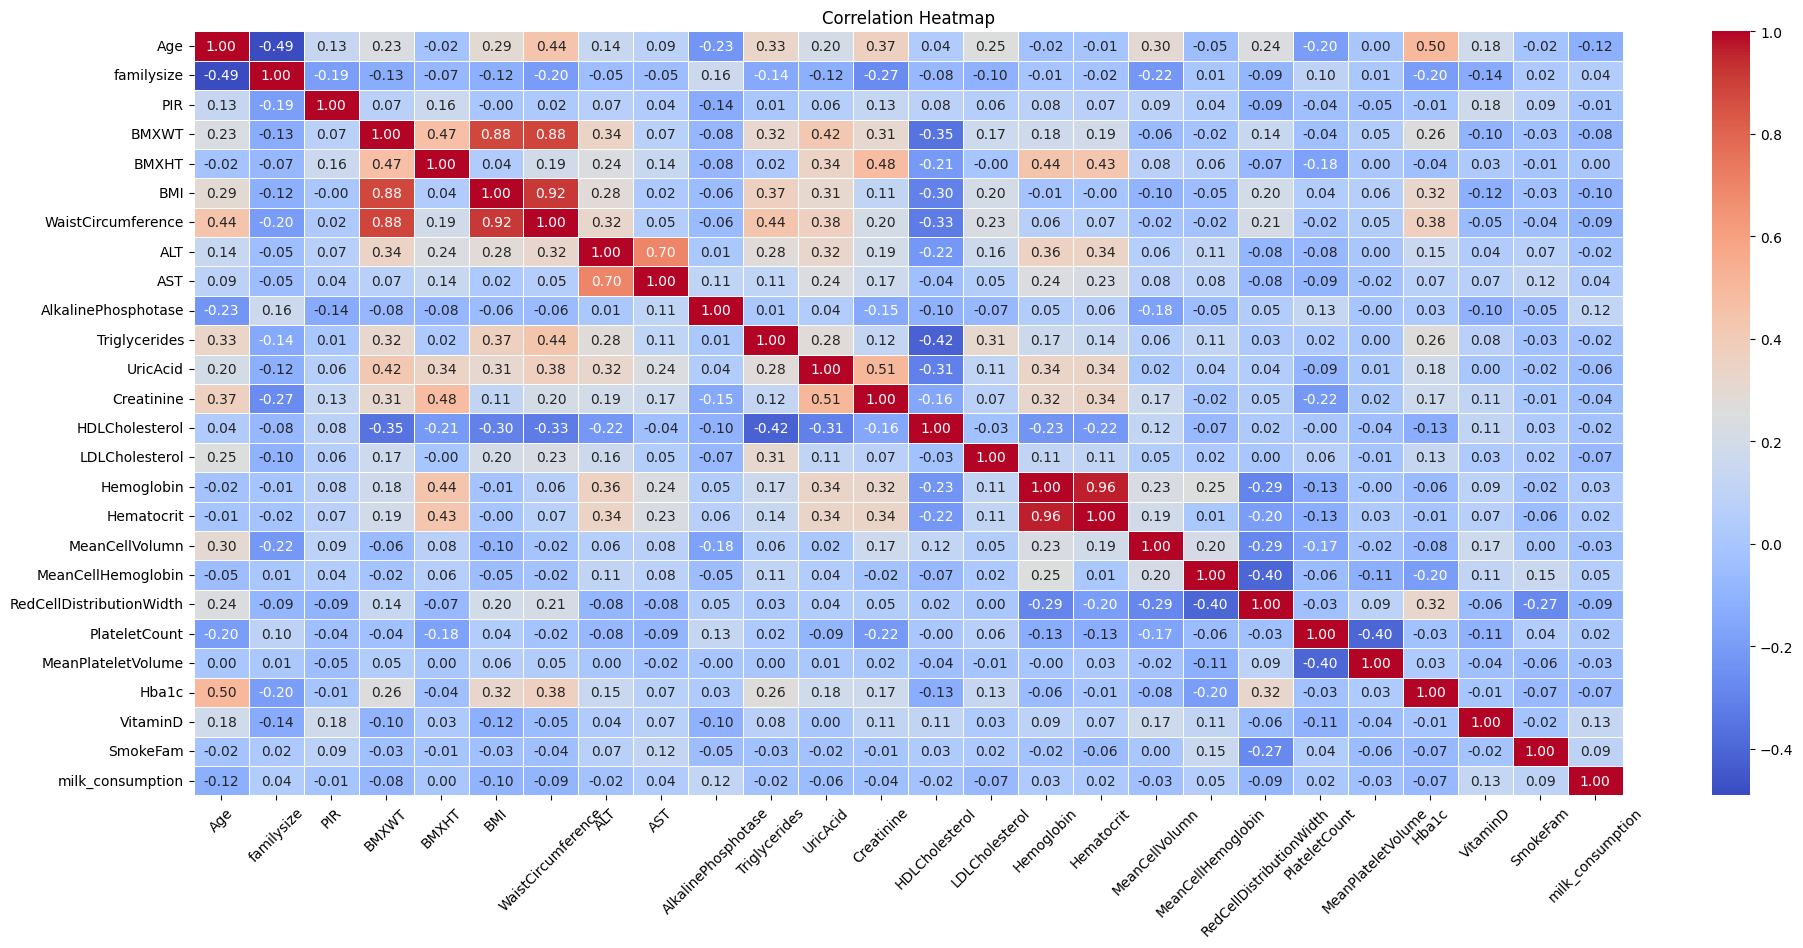

In [14]:
# drop columns that are not needed to measure correlation
df_dq_numerics = df_dq.drop(columns=[
    "Gender", "Race", "FastingGlucose",
    "Cholesterol", "CreatinineUmol"
])

# Check consistency between columns with spearman correlation
correlation_matrix = df_dq_numerics.corr(method = "spearman")

plt.figure(figsize=(20, 10))  # Kích thước biểu đồ
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

##### ✅ Conclusion

1. 🔗 **BMI** strongly correlates with **Waist Circumference**  
2. 🧪 **ALT** strongly correlates with **AST**   
3. 🩸 **HbA1c** strongly correlates with **Age** and **Waist Circumference**  
4. 🧬 **Hemoglobin** strongly correlates with **Hematocrit**  
5. 🧁 **Triglycerides** strongly correlate with **LDL**



##### 3.3 Check duplicated value

In [15]:
# 5. Check row duplicated
df_dup = df[df.duplicated(keep=False)]
print(f"Number of duplicated rows: {len(df_dup)}")
print("Percent of duplicated rows:", len(df_dup) / len(df) * 100, "%")

Number of duplicated rows: 0
Percent of duplicated rows: 0.0 %


#### 4. Timelineness

In [ ]:
# Dữ liệu được cập nhật liên tục từ 2001 đến 2018